# **Classification With Model Interpretation** 

# **Pre-processing**

## **Importing Modules**


In [4]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
import warnings
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import VotingClassifier
import shap
shap.initjs()
import lime
from lime import lime_tabular
warnings.simplefilter('ignore')
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/dsadmin/.local/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/dsadmin/.conda/envs/test_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Reading Data**

In [5]:
insurance_df = pd.read_csv('train.csv', index_col='Id')
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


## **Shape**

In [6]:
insurance_df.shape

(59381, 127)

## **Distribution of Target Variable**

In [7]:
insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

> **Class imbalance can be seen here. Also there 8 categories, lets combine them to 3 categories**


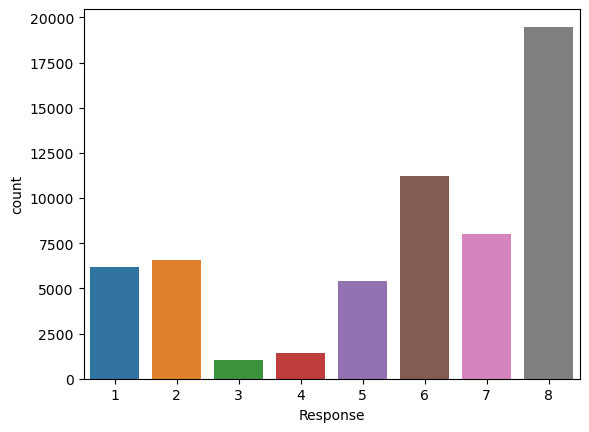

In [8]:
sns.countplot(x=insurance_df['Response']);

**Response 8 has highest values and 3 has the least**

## **Processing Target Variable**

> **Still some imbalance can be seen**

## **Removing old target variable**

## **Making categorical and numerical columns list**

In [9]:
# Making lists with categorical and numerical features.
categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype =='object']

numerical = categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype !='object']

In [10]:
categorical

['Product_Info_1',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_10',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',

## **Visualizations On Categorical Features**

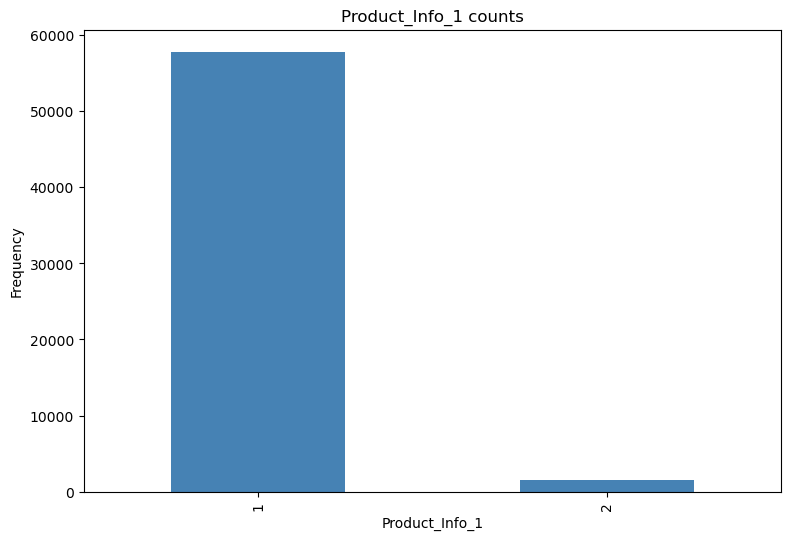

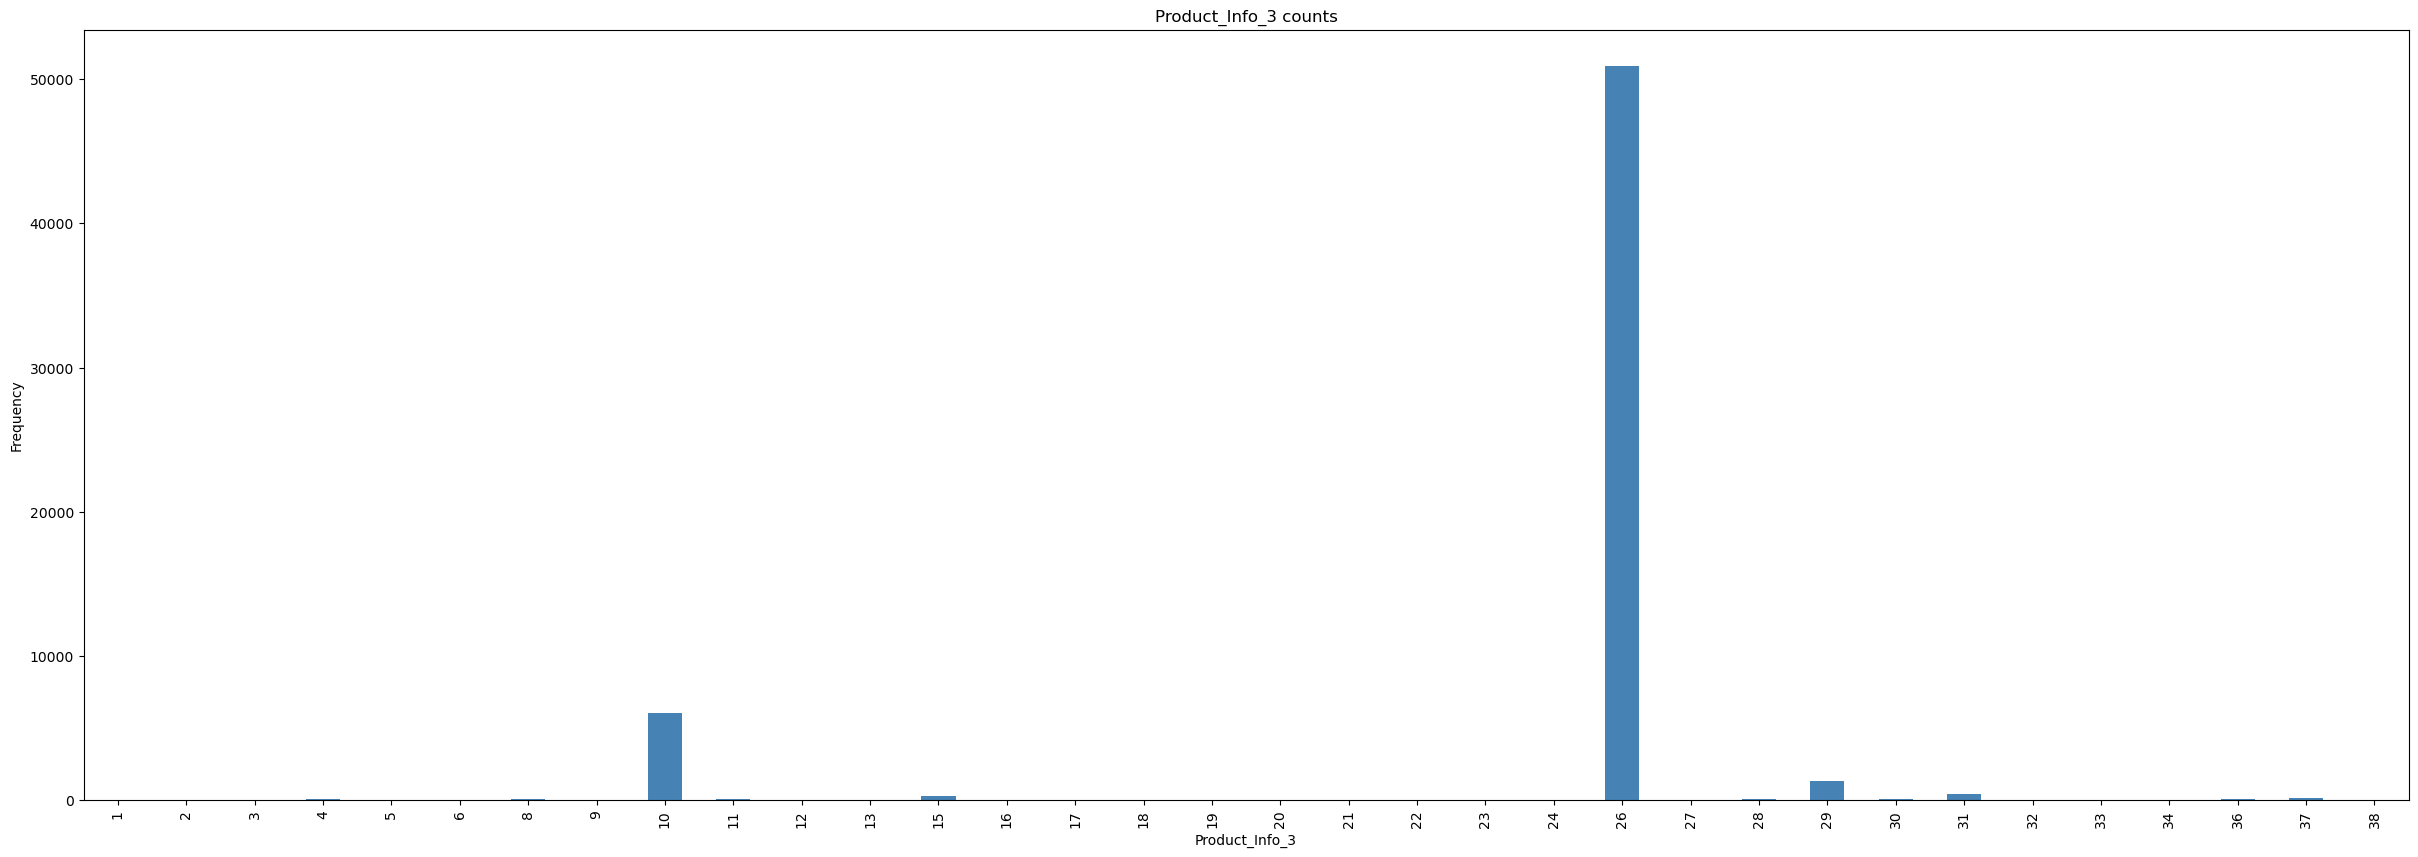

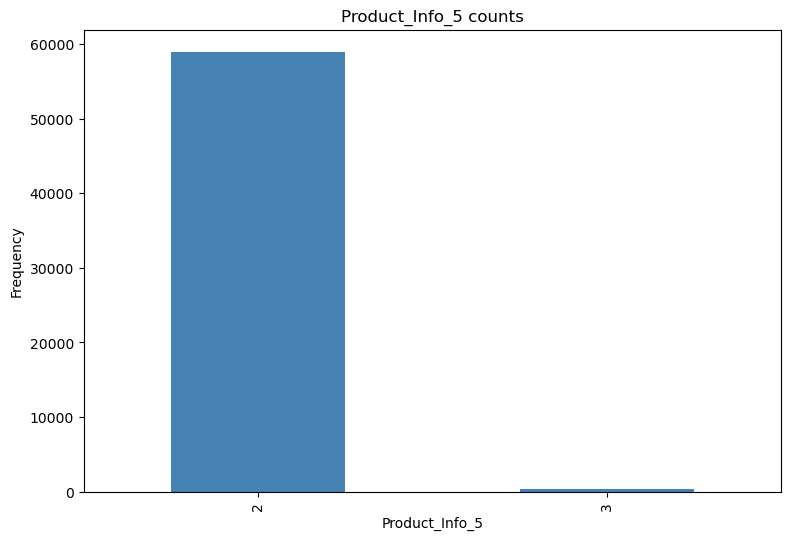

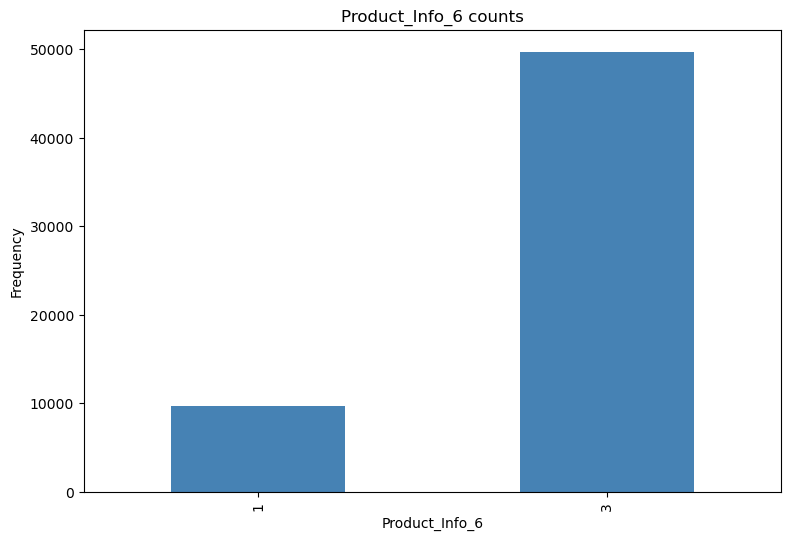

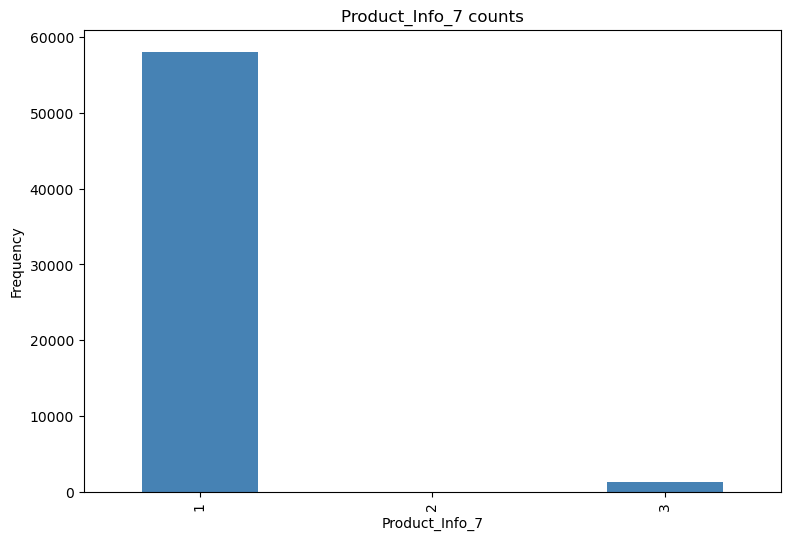

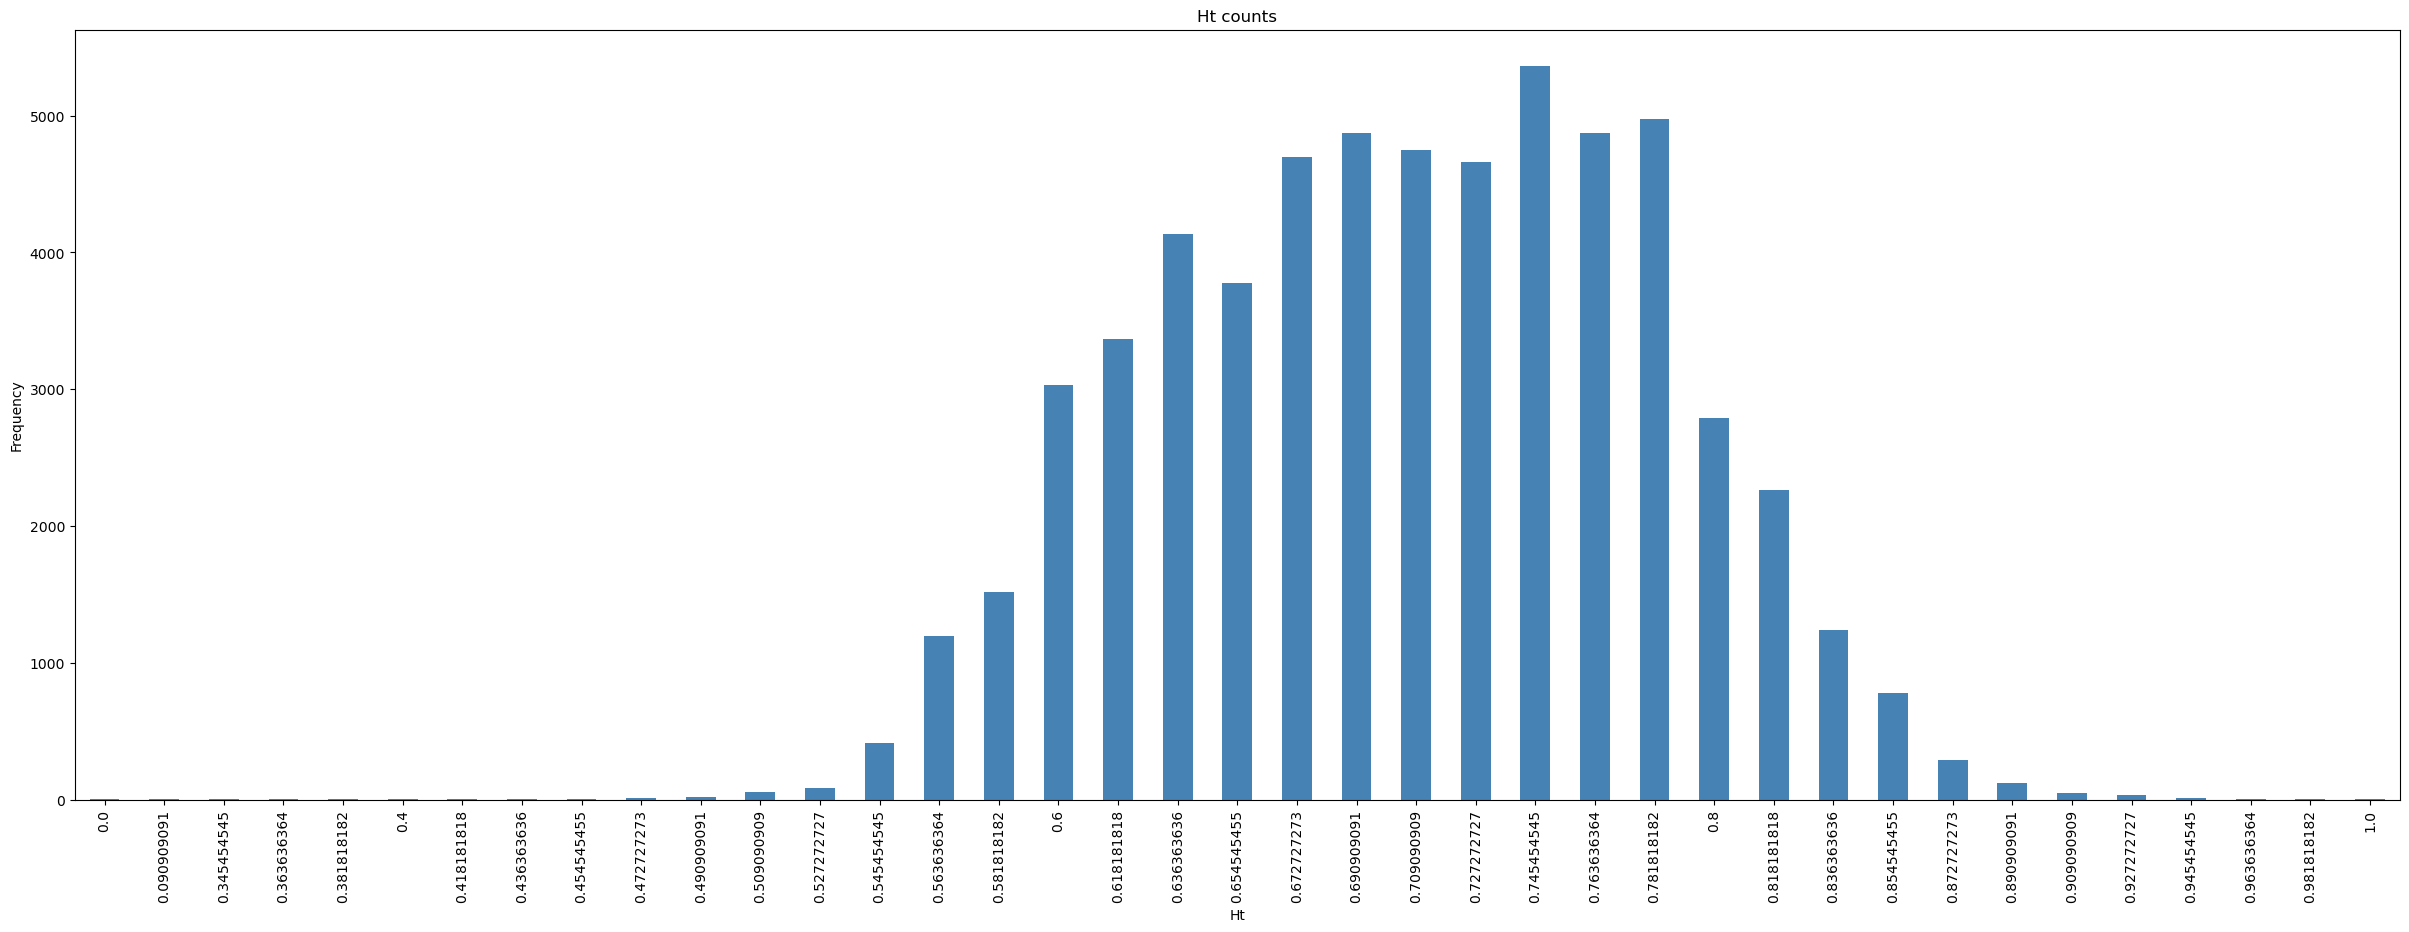

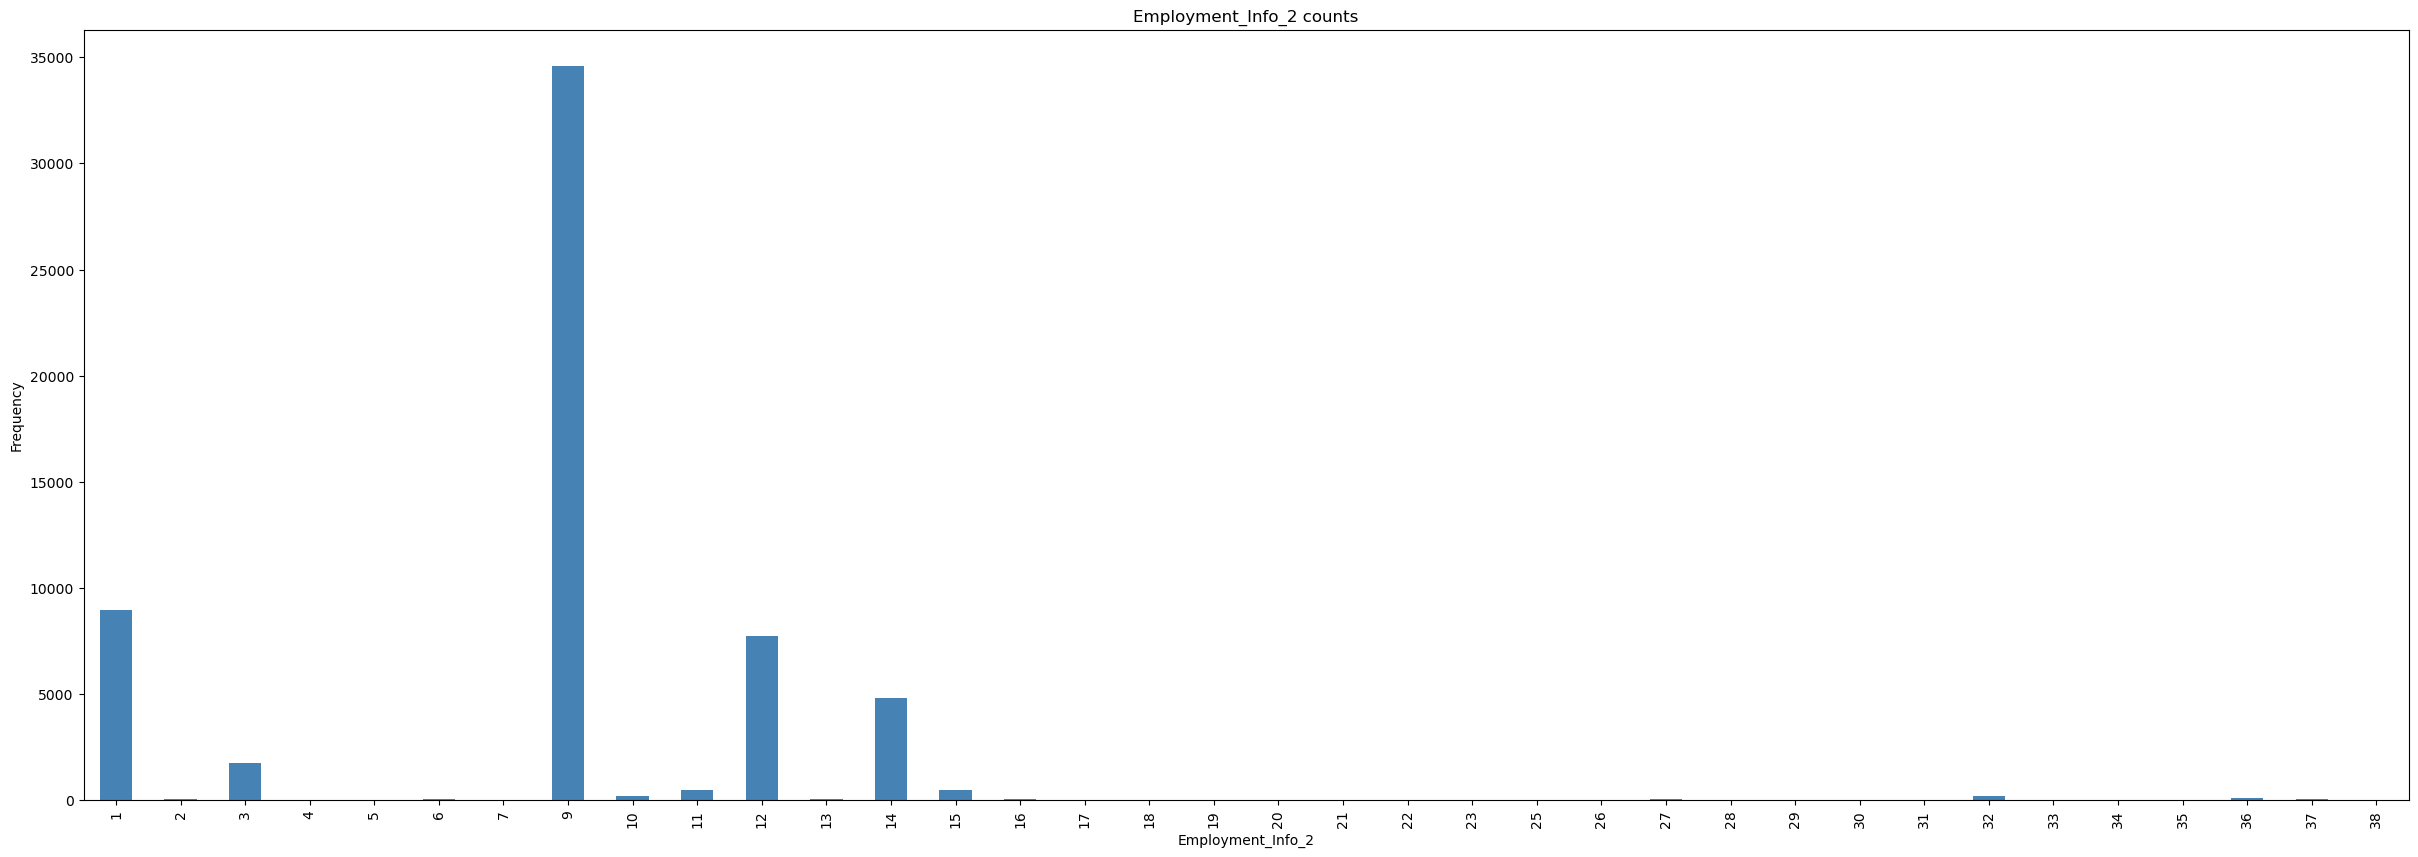

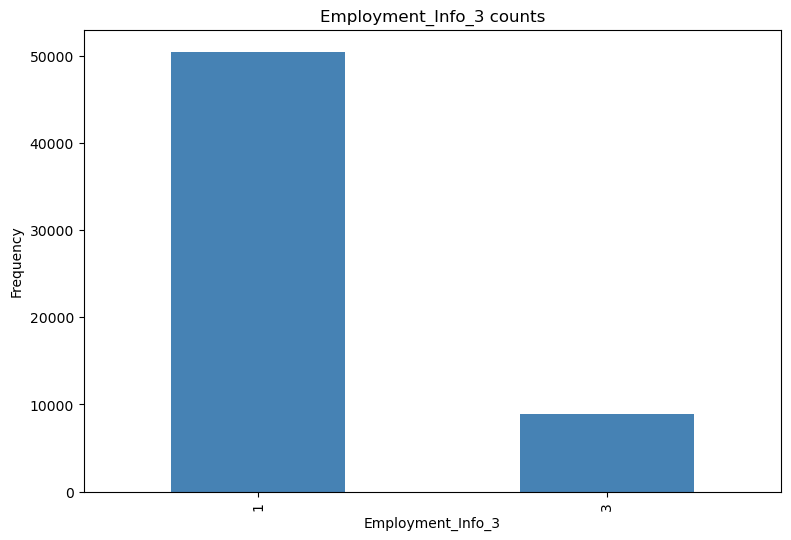

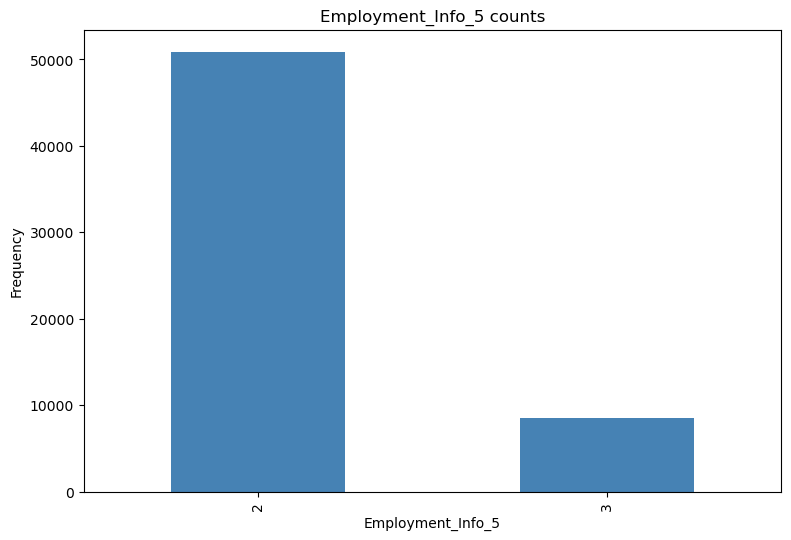

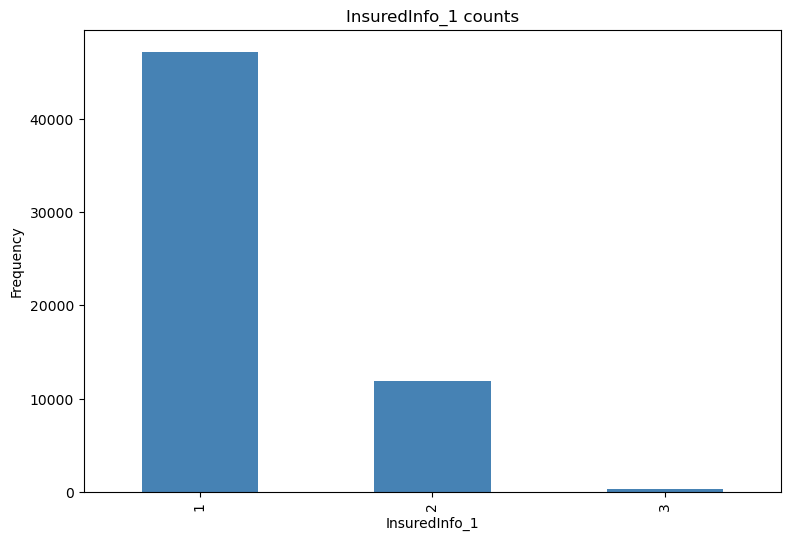

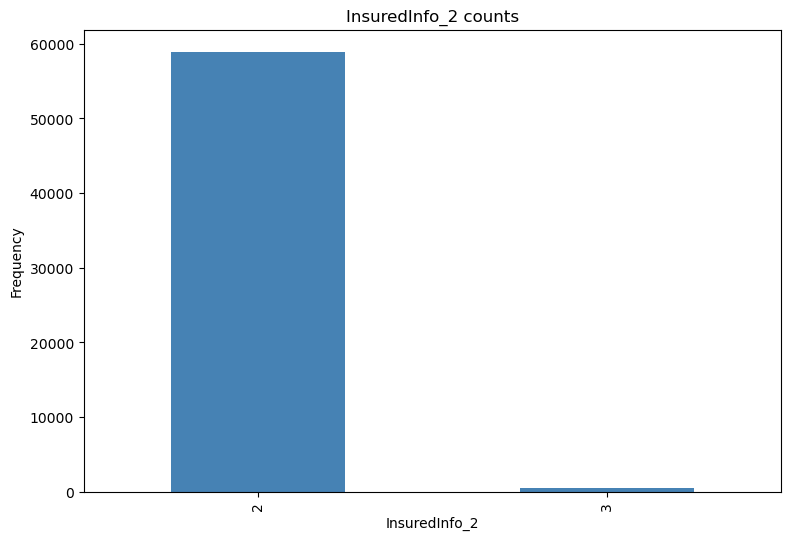

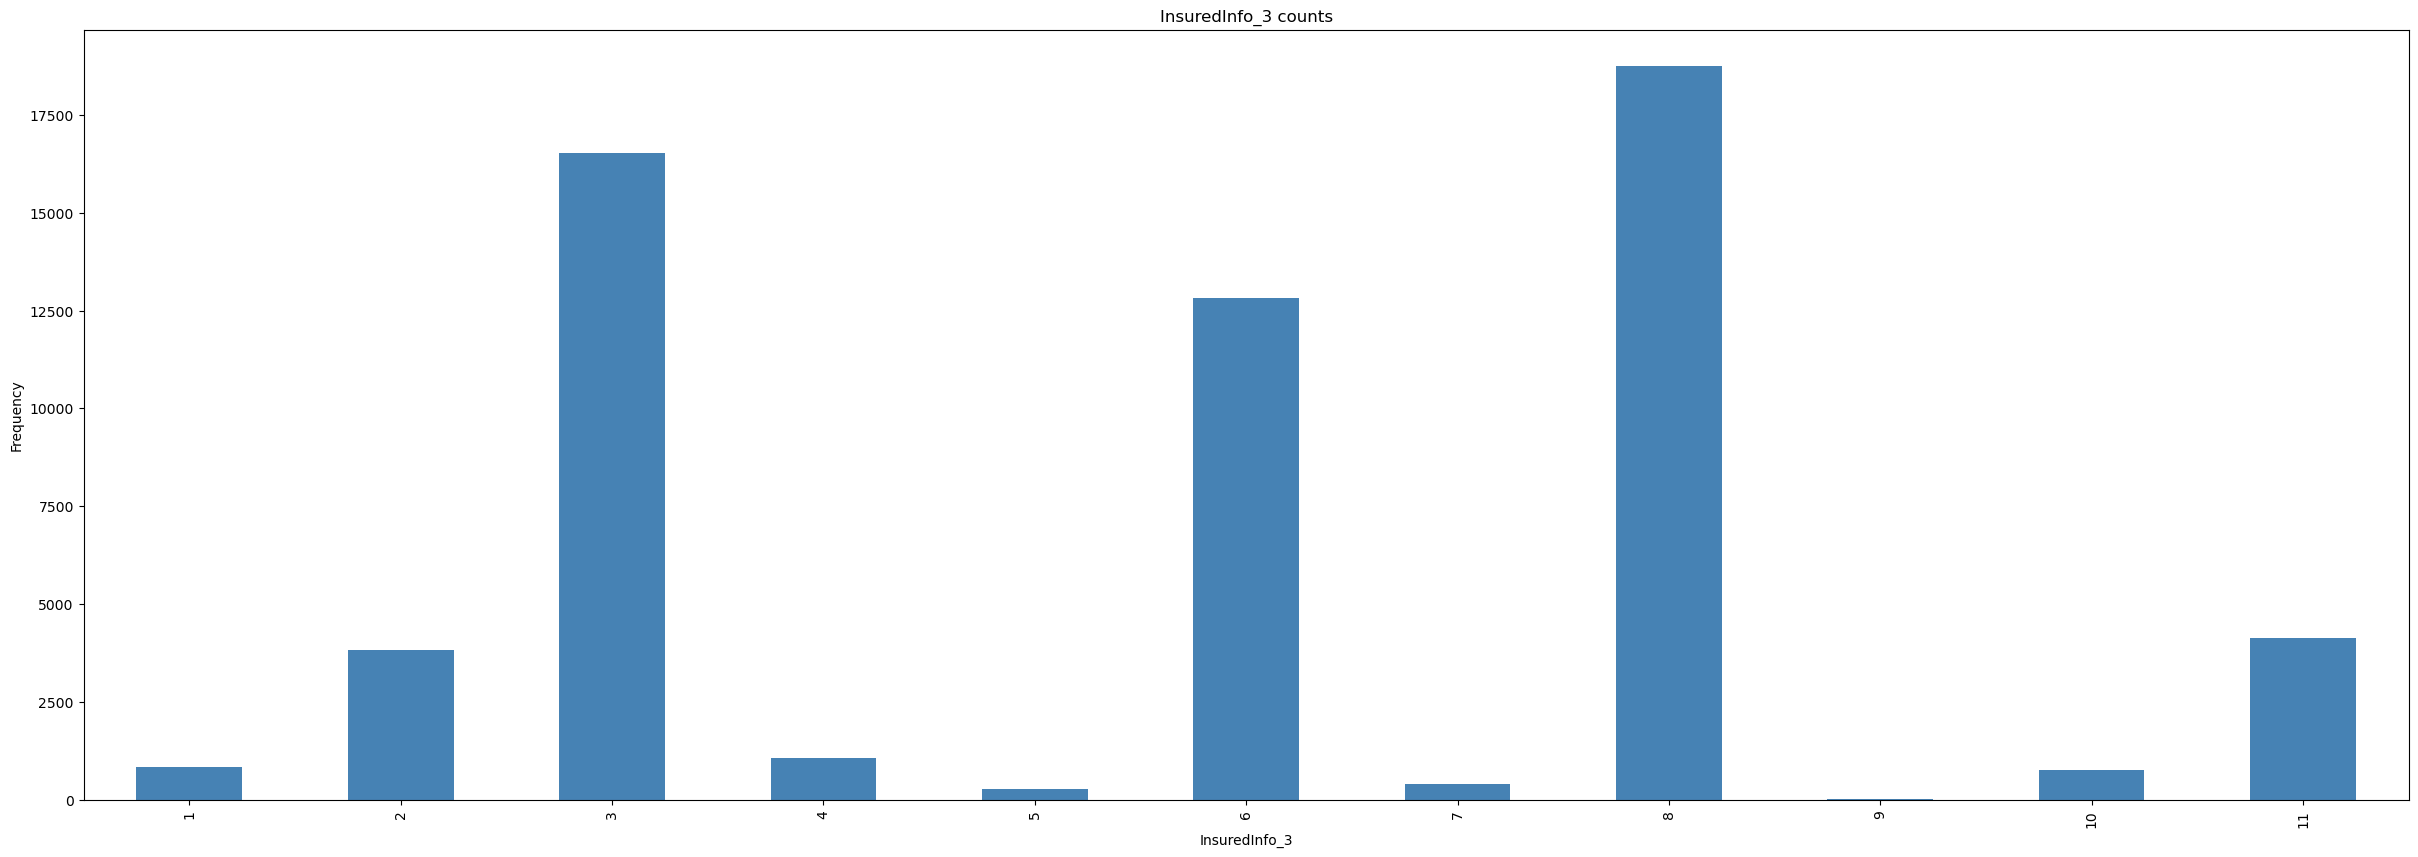

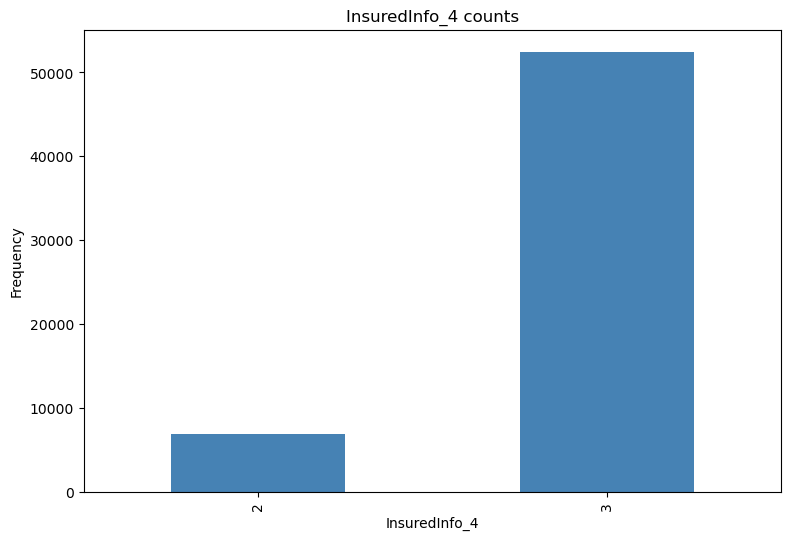

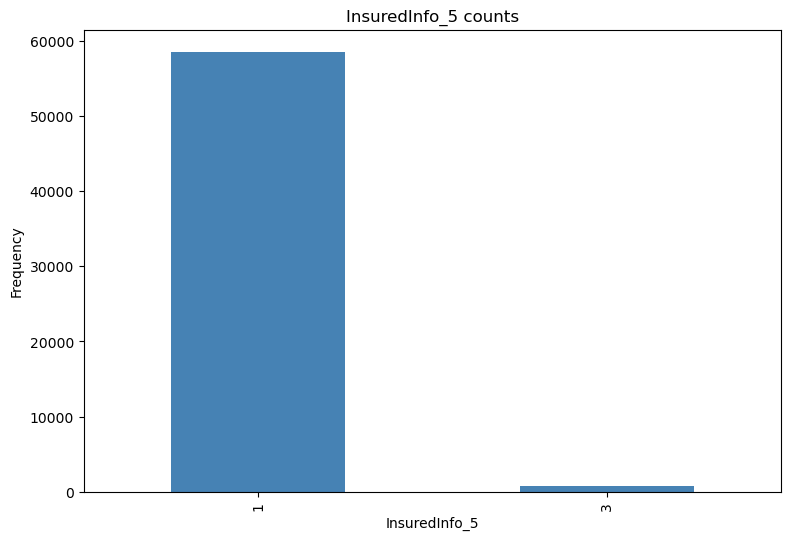

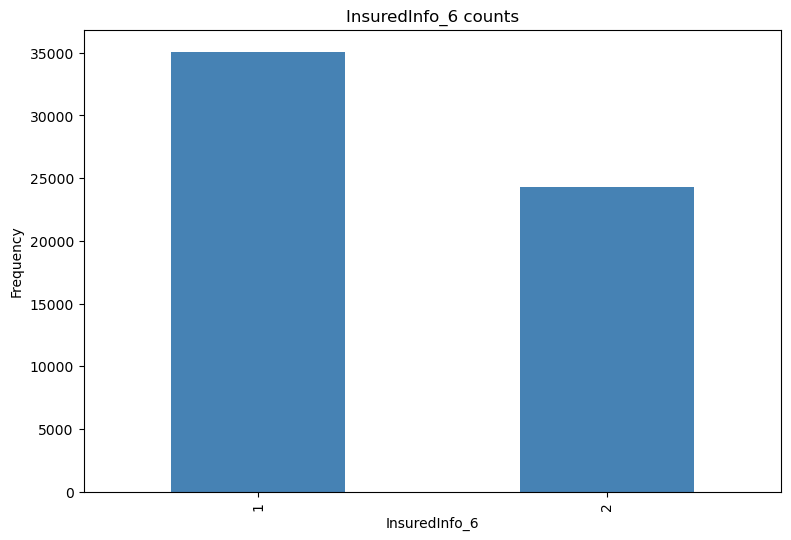

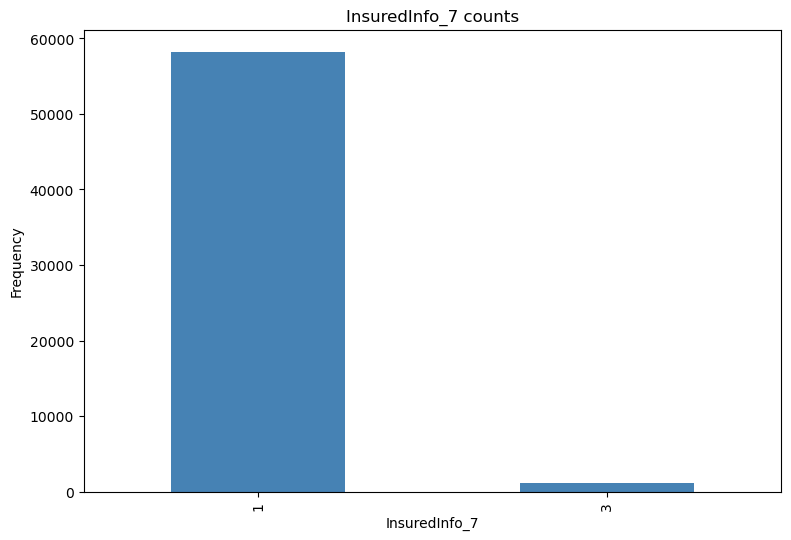

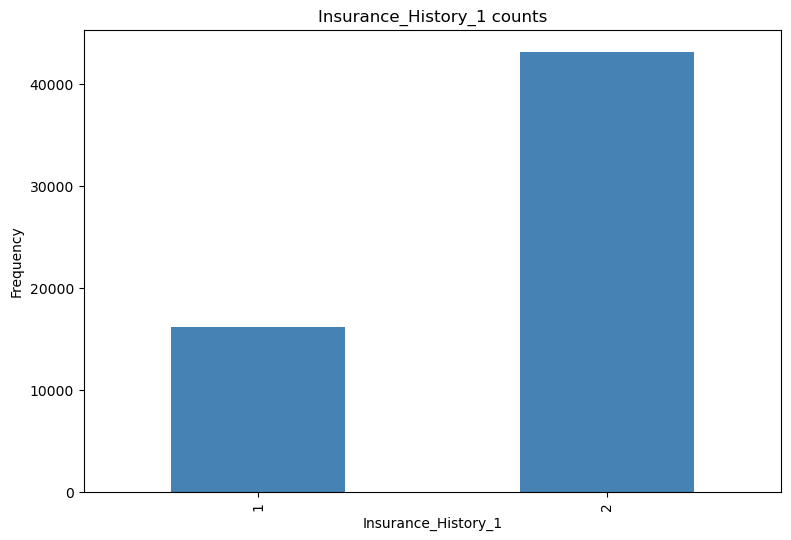

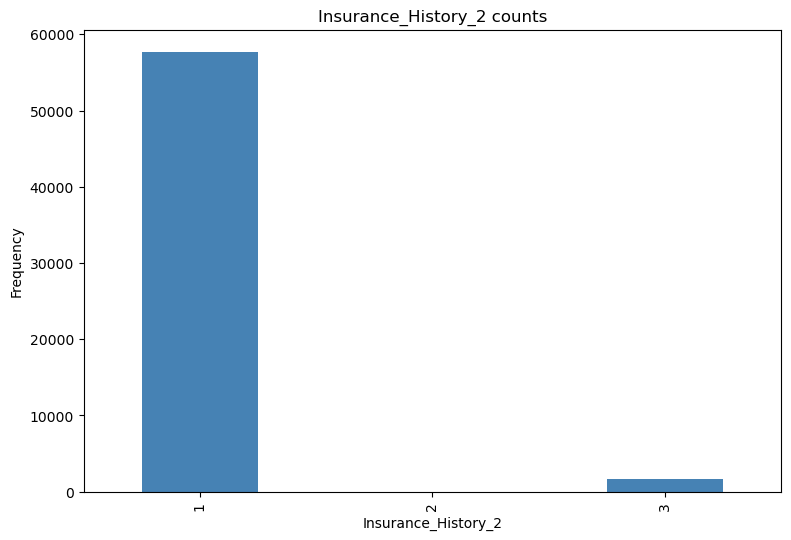

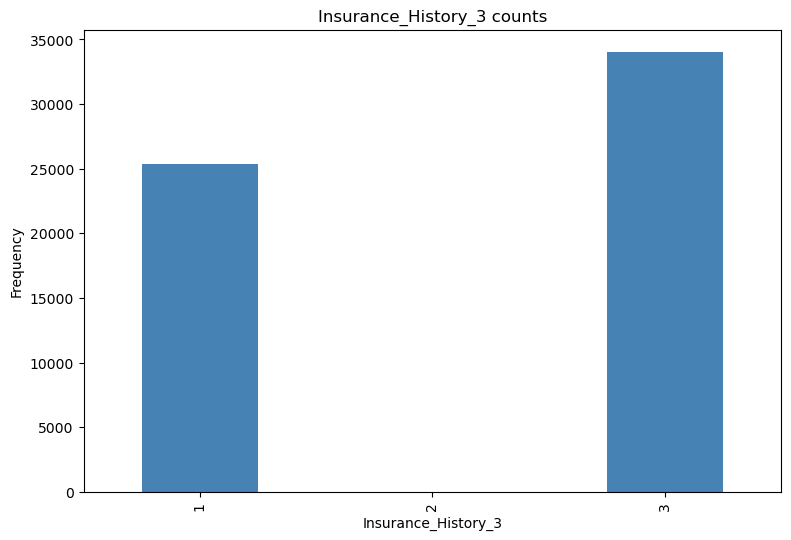

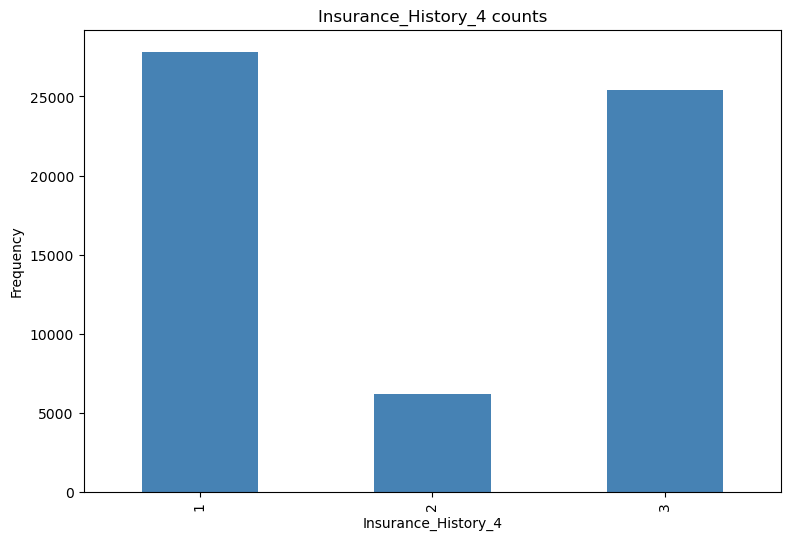

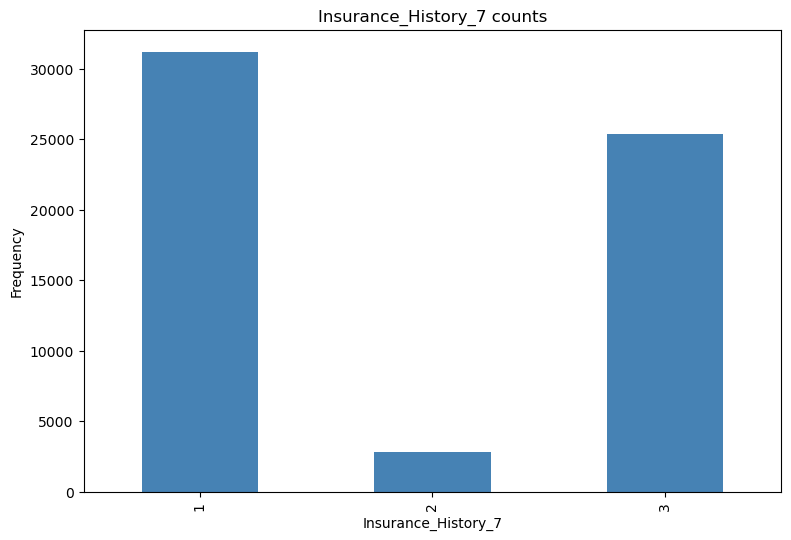

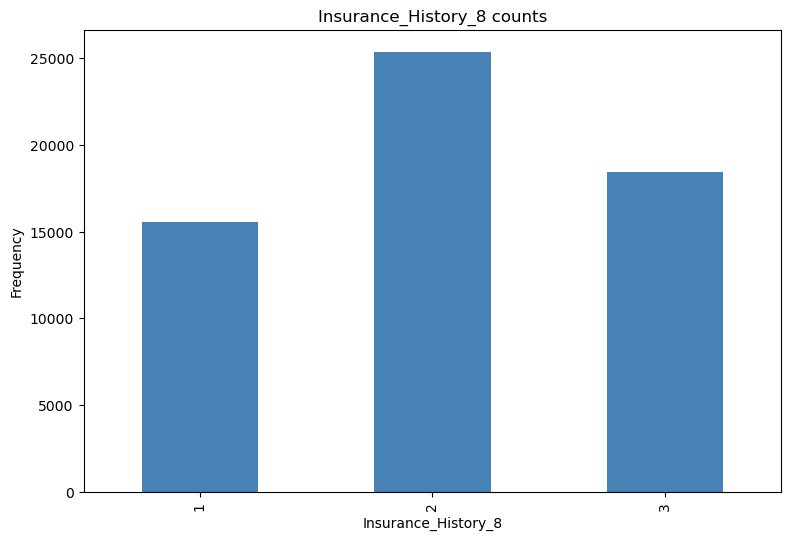

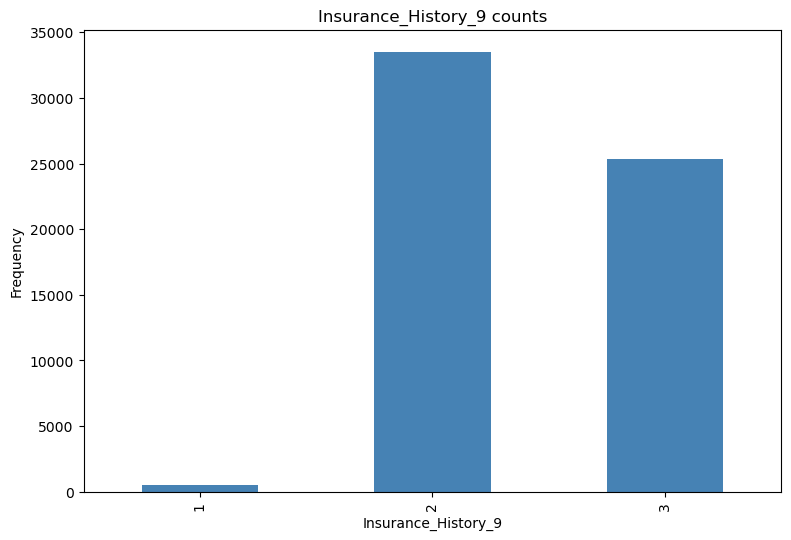

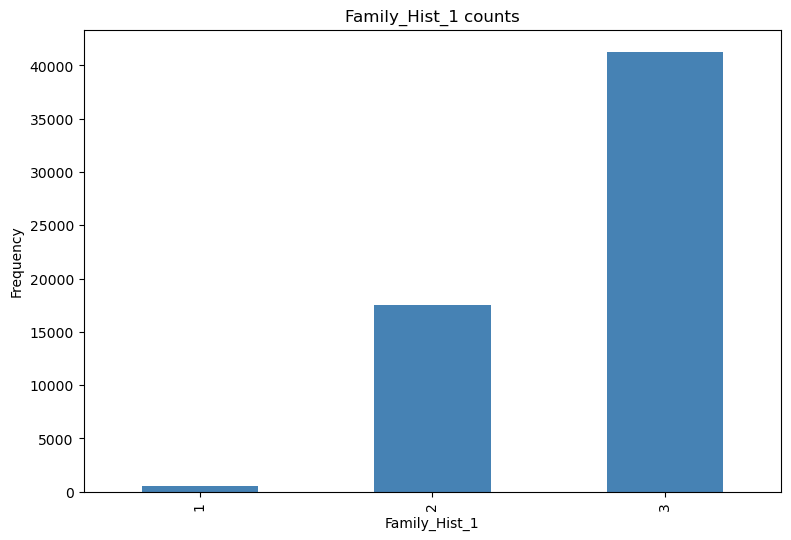

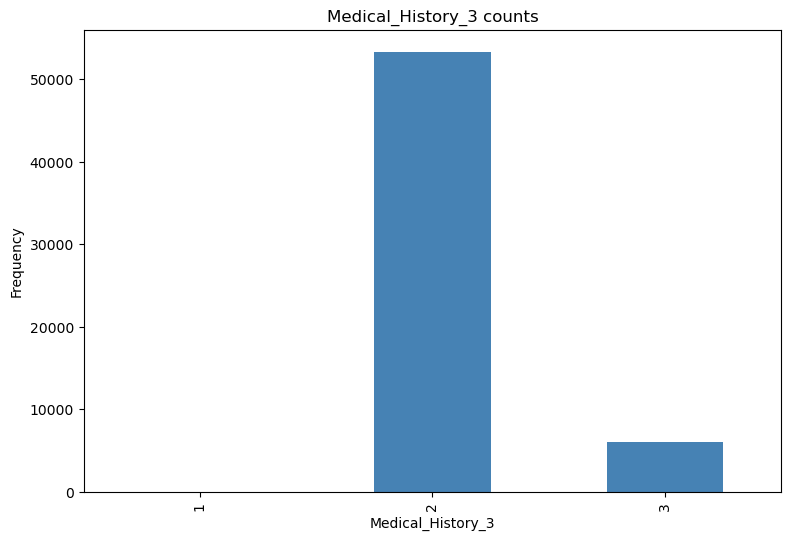

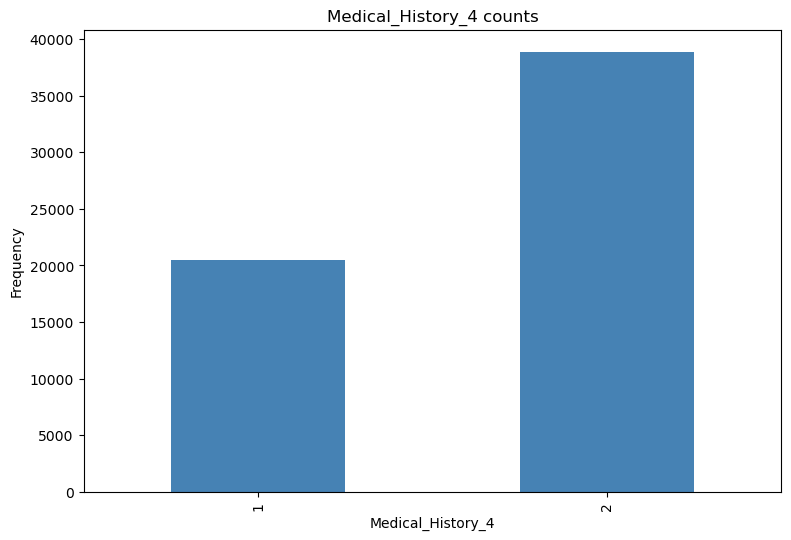

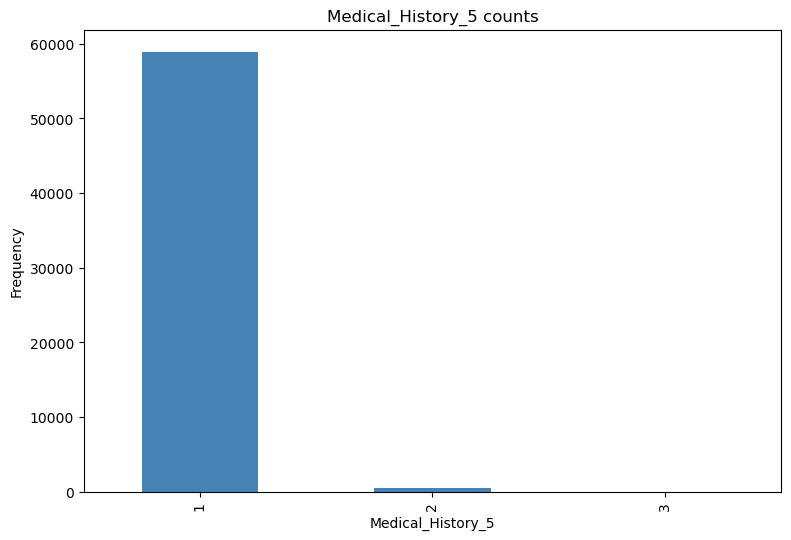

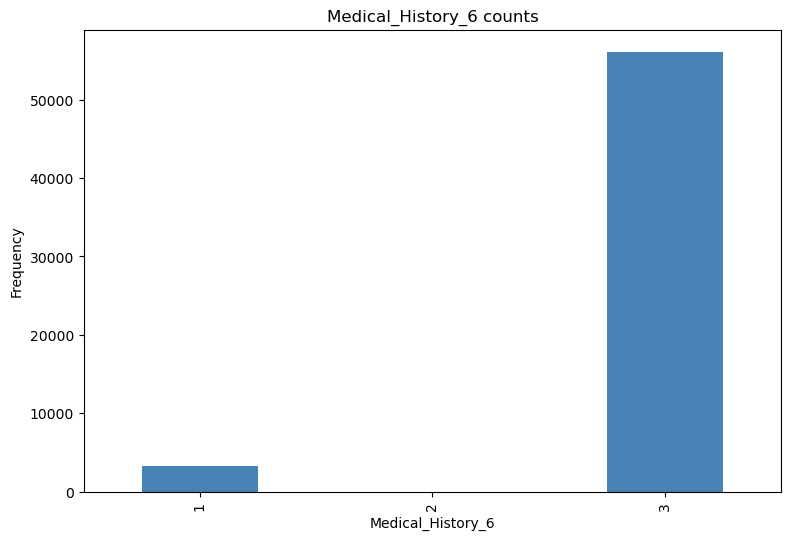

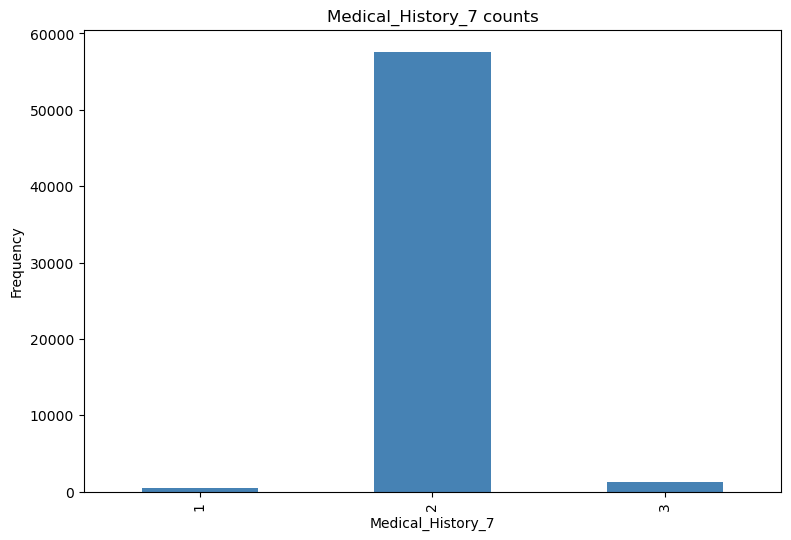

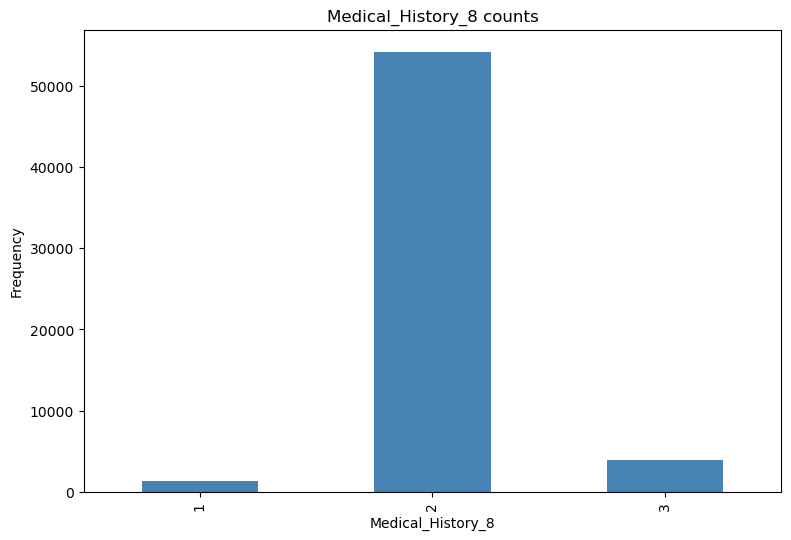

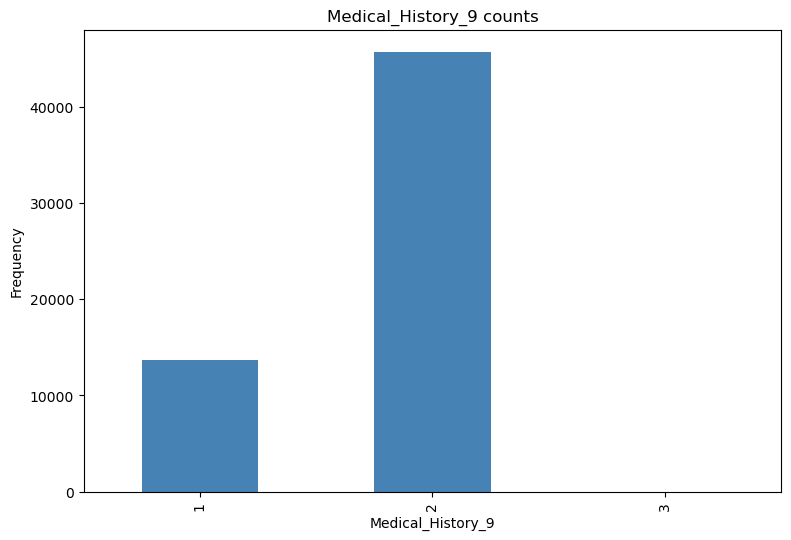

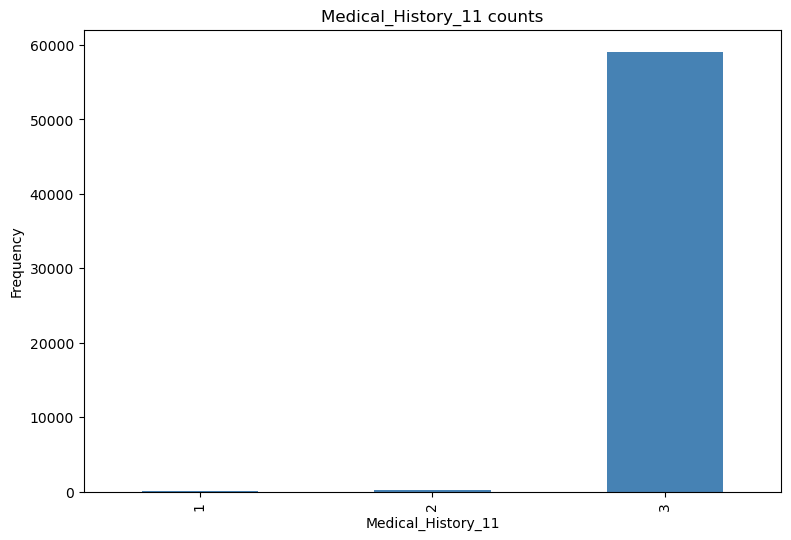

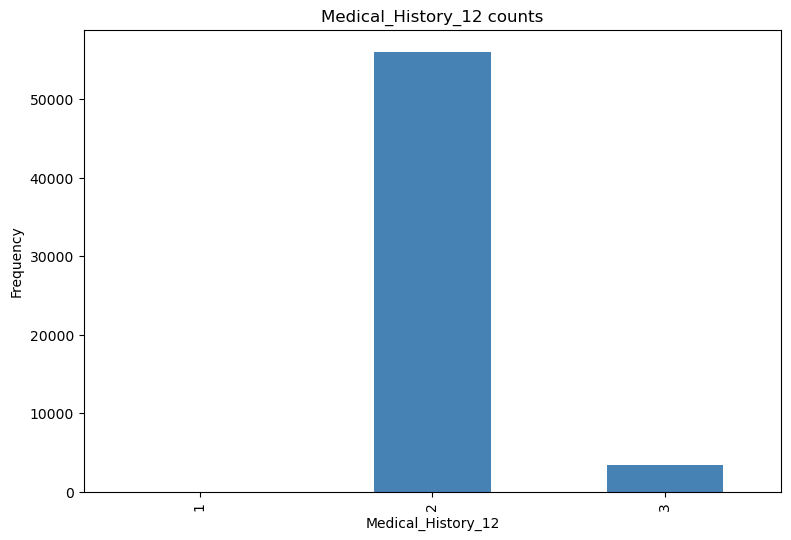

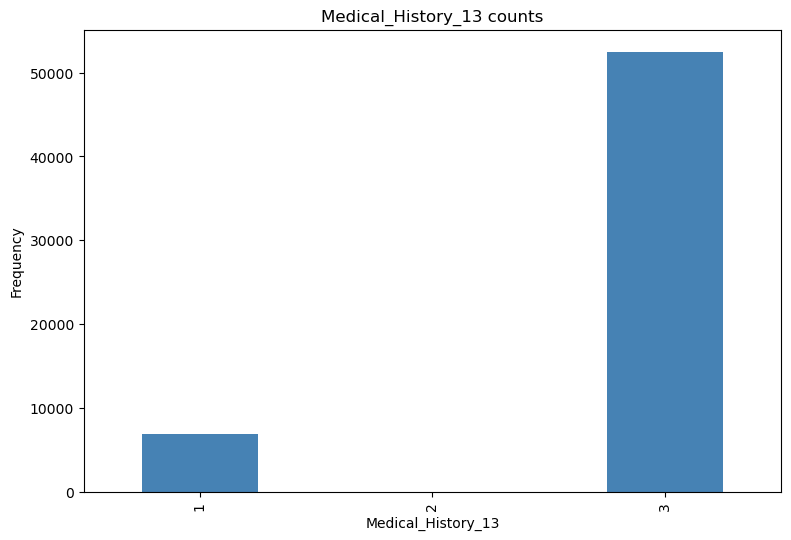

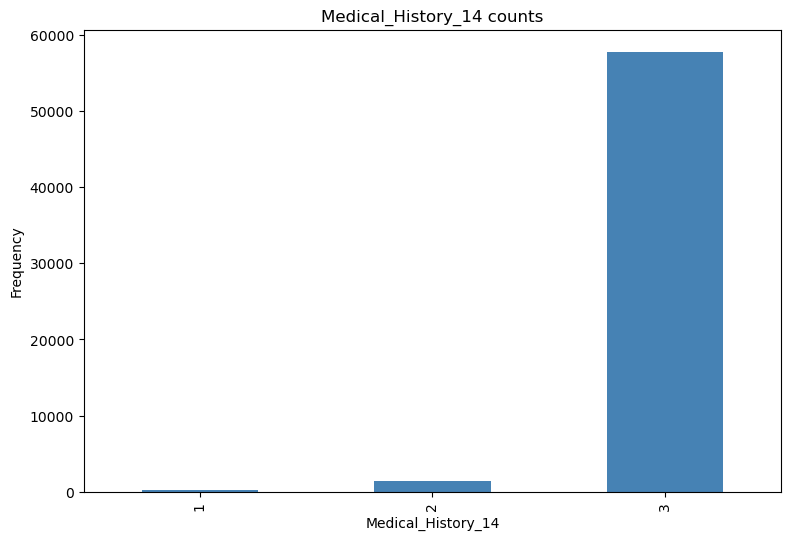

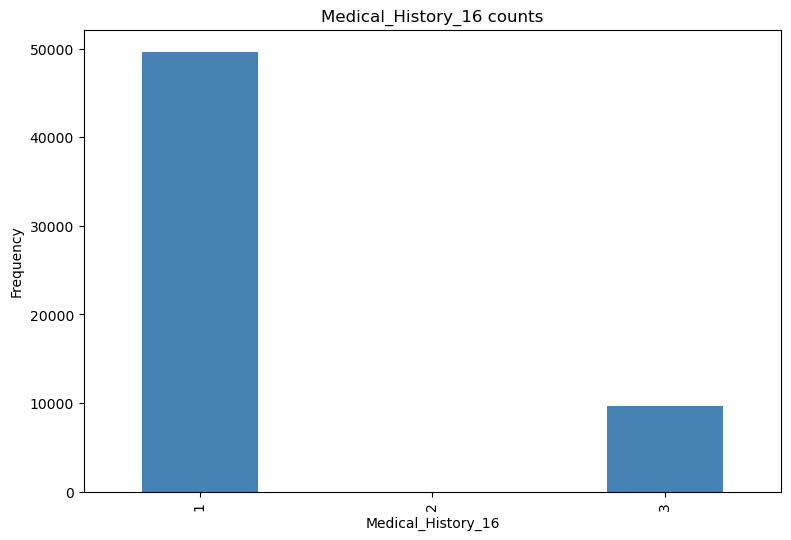

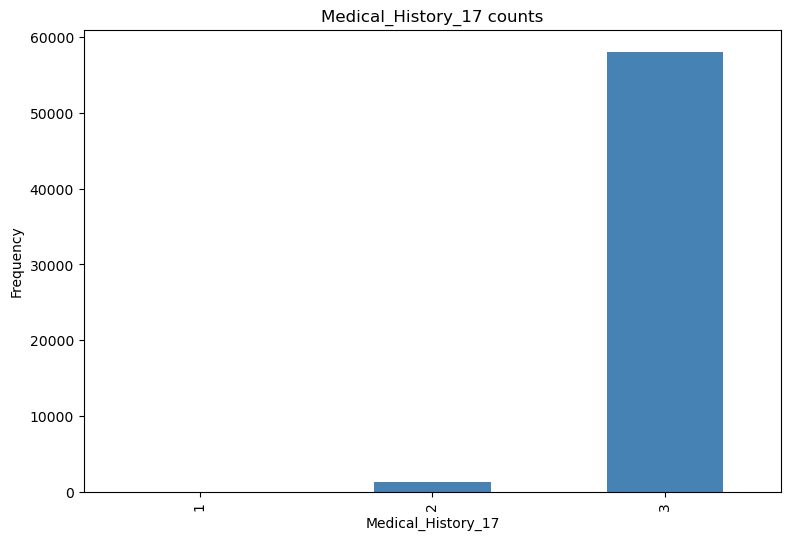

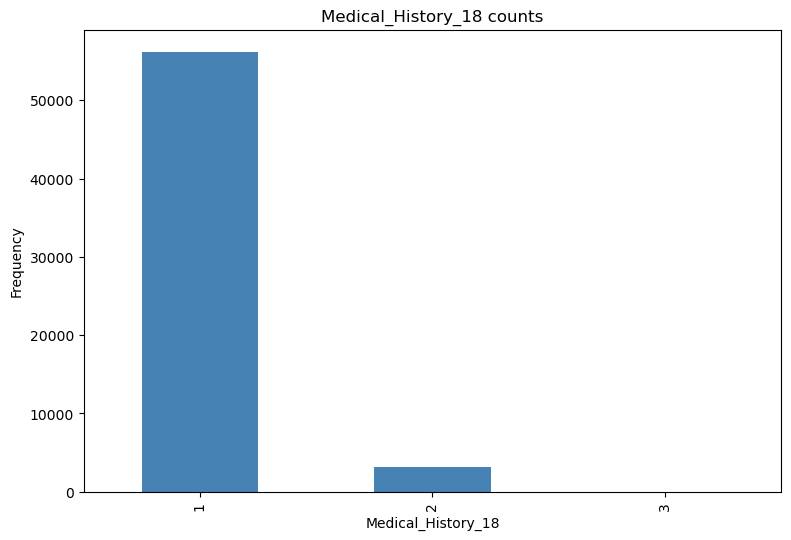

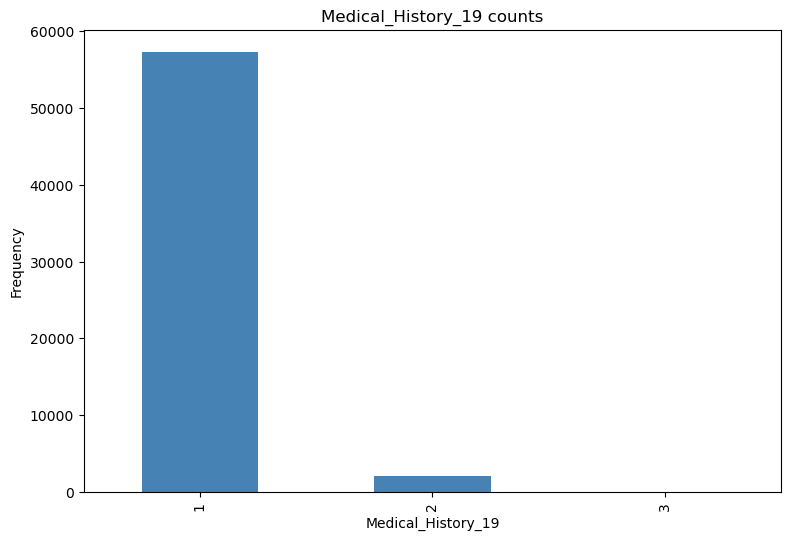

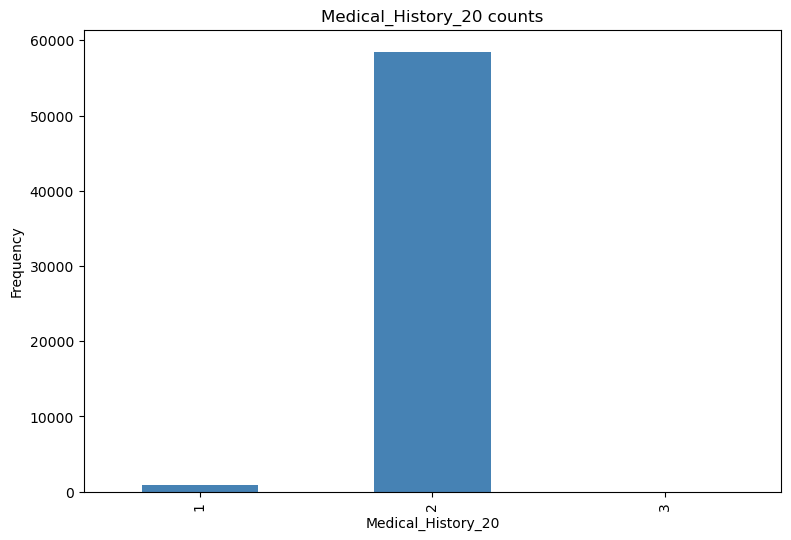

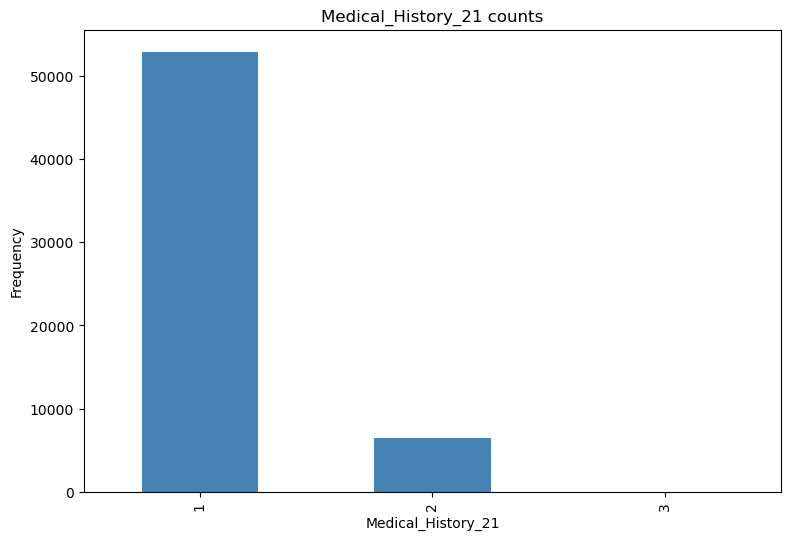

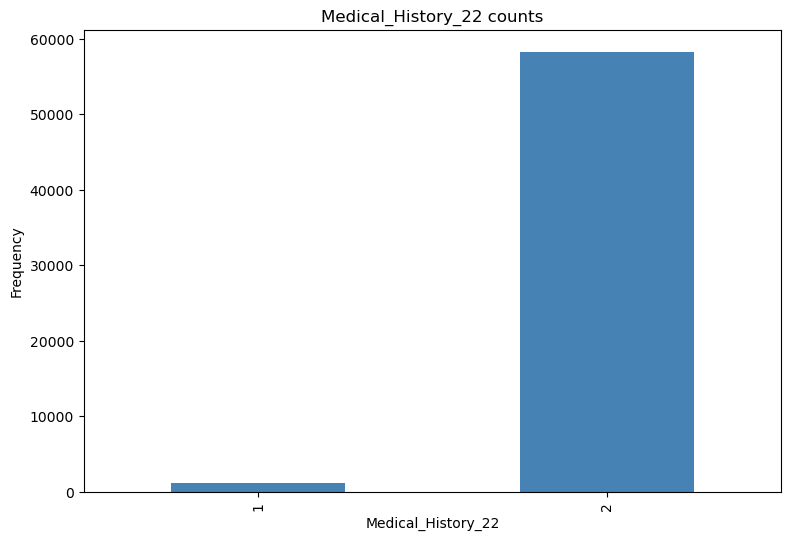

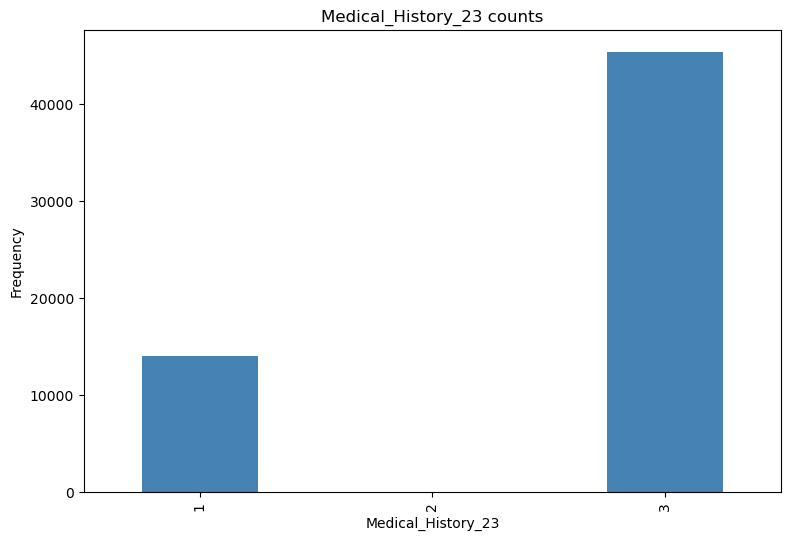

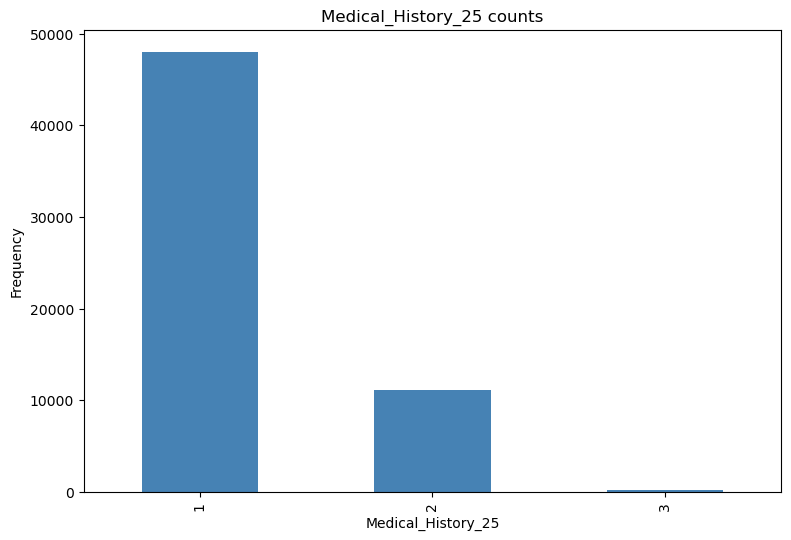

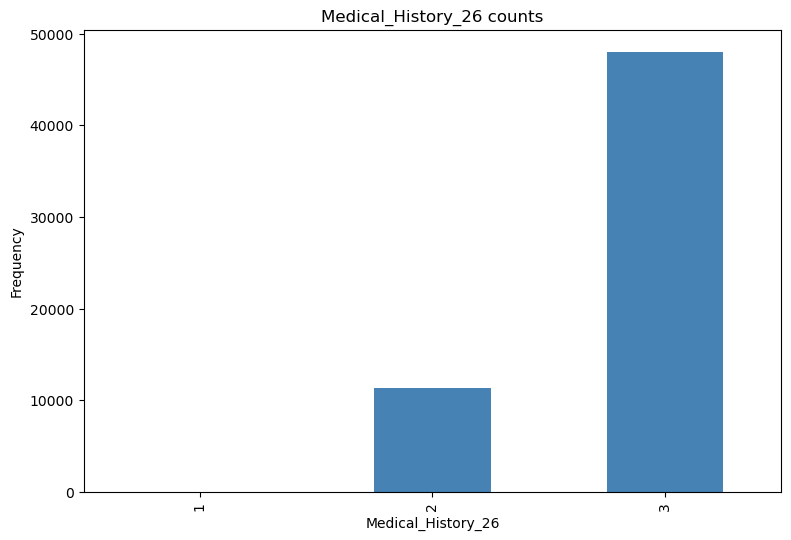

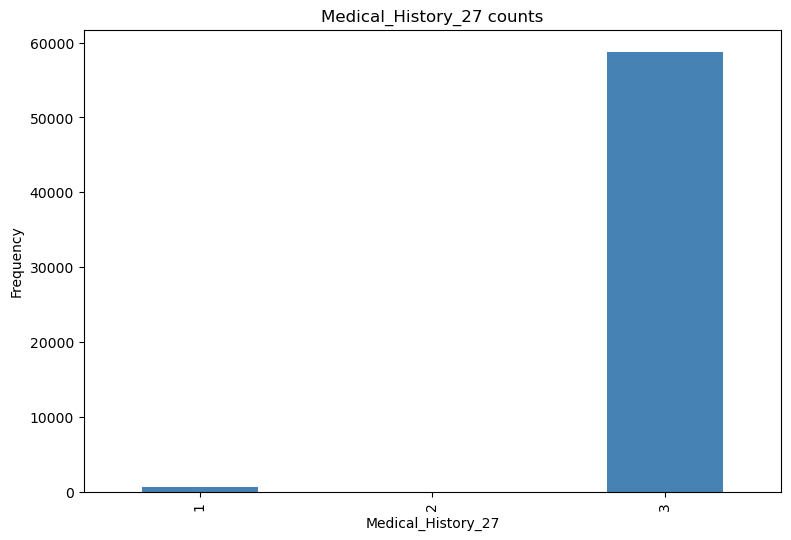

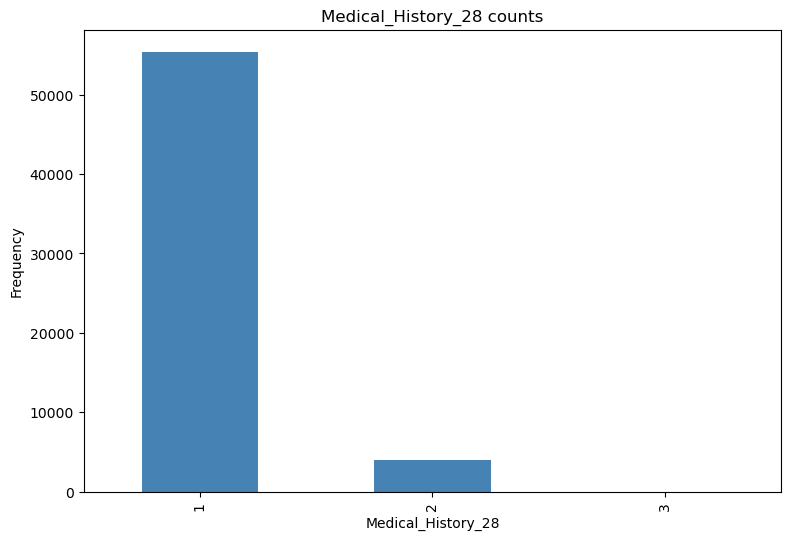

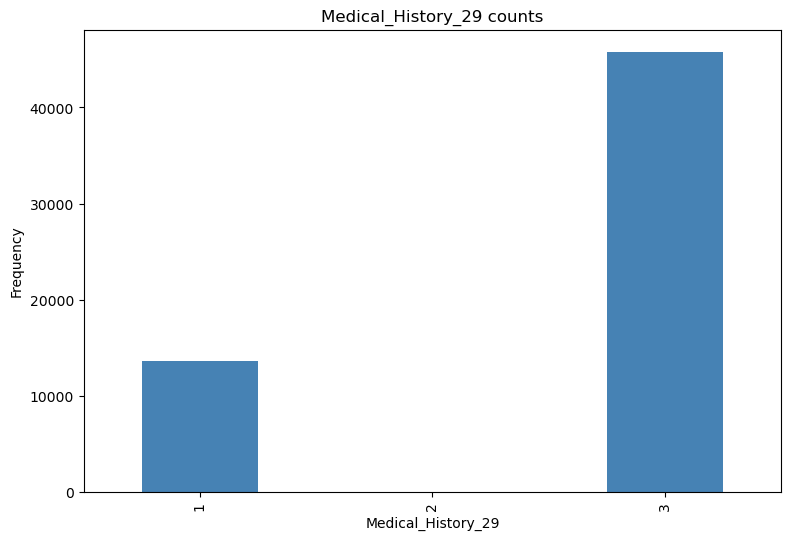

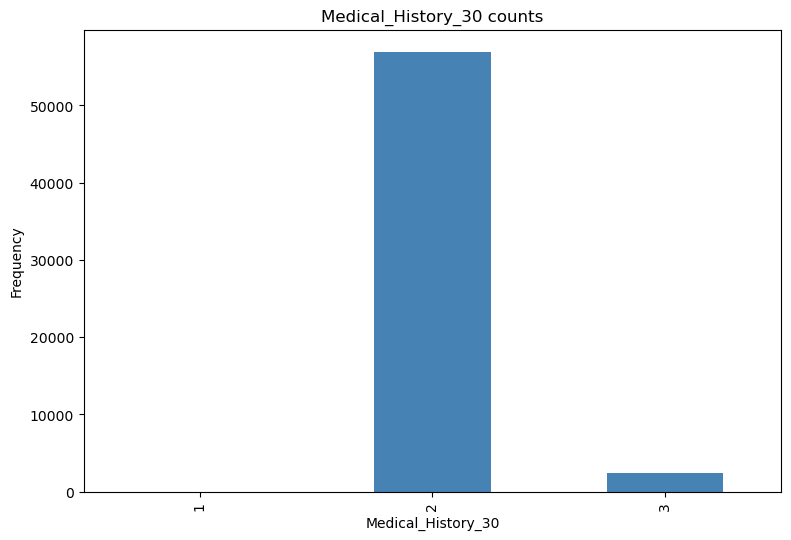

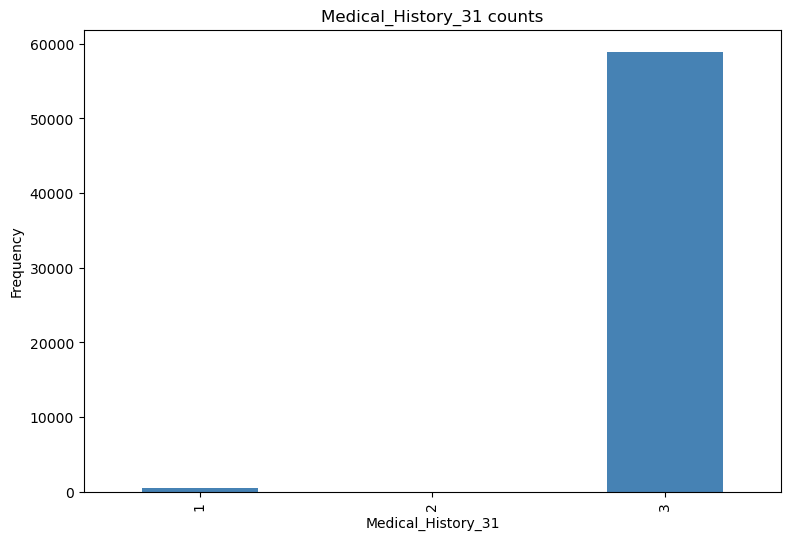

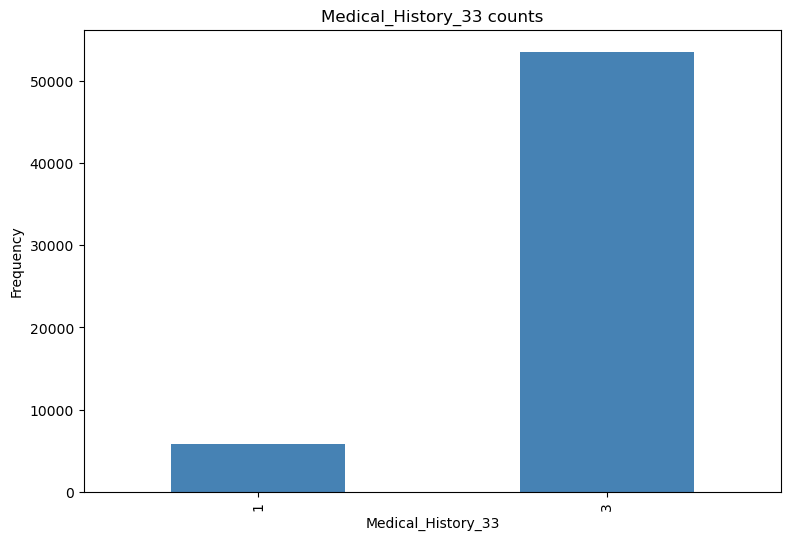

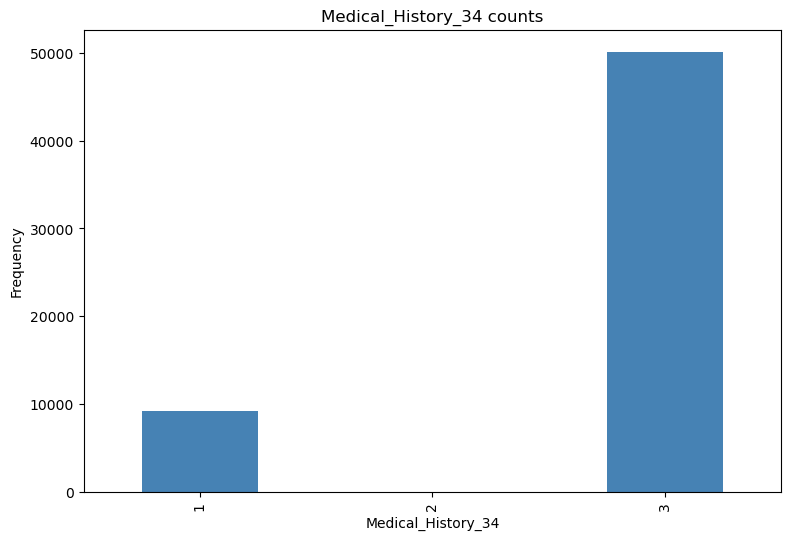

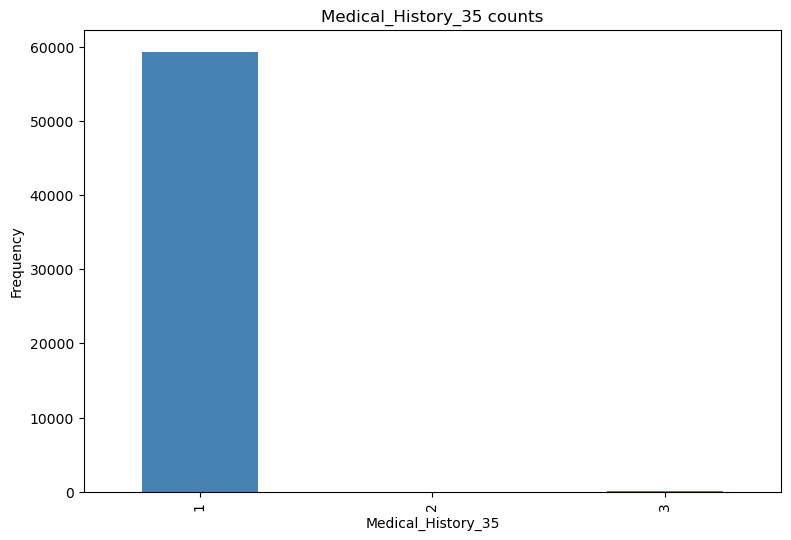

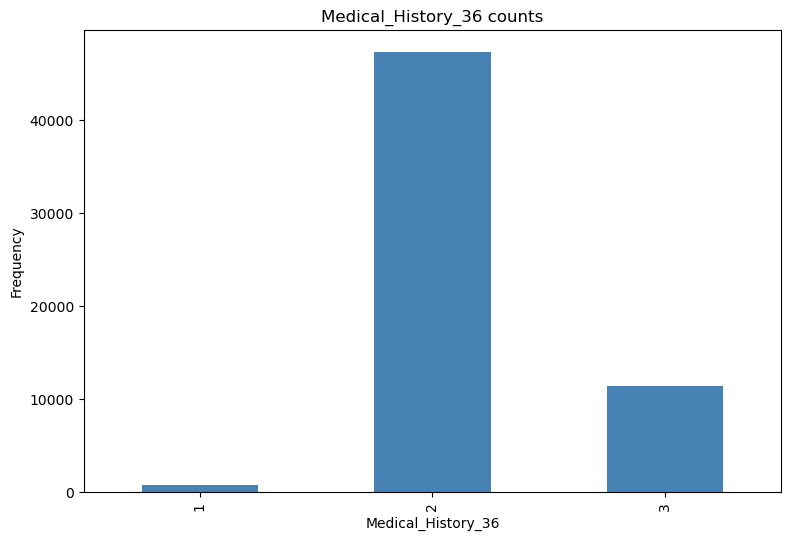

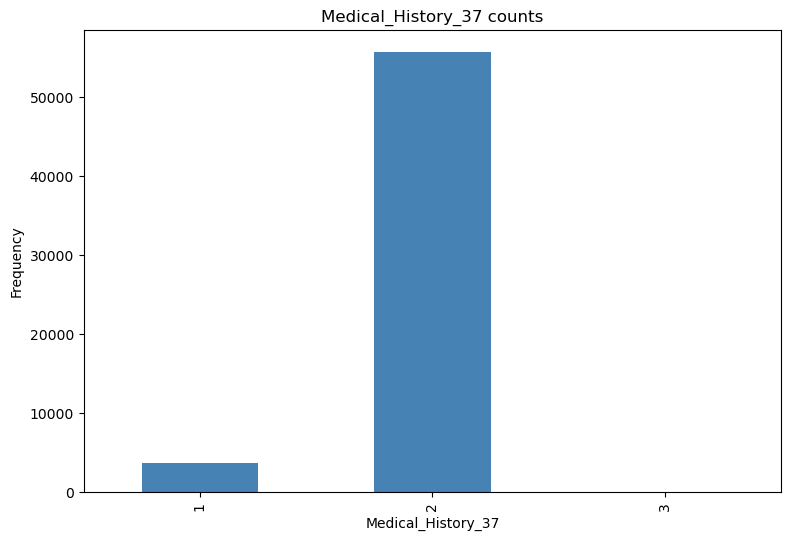

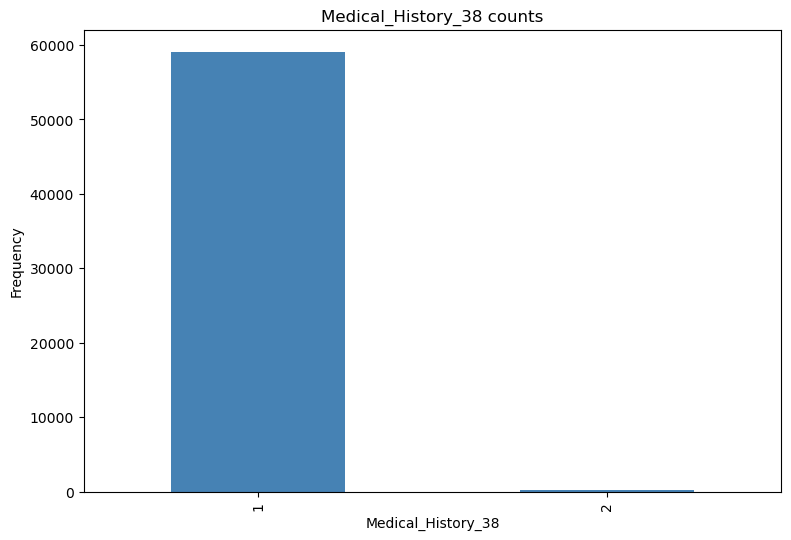

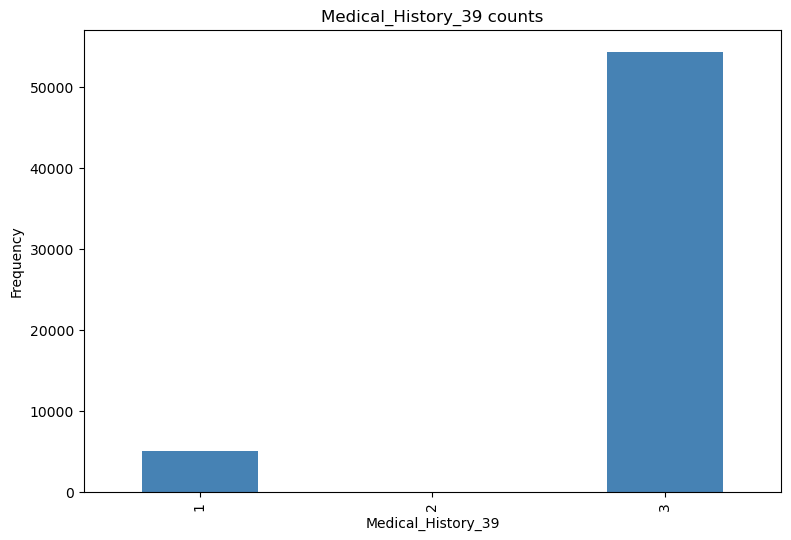

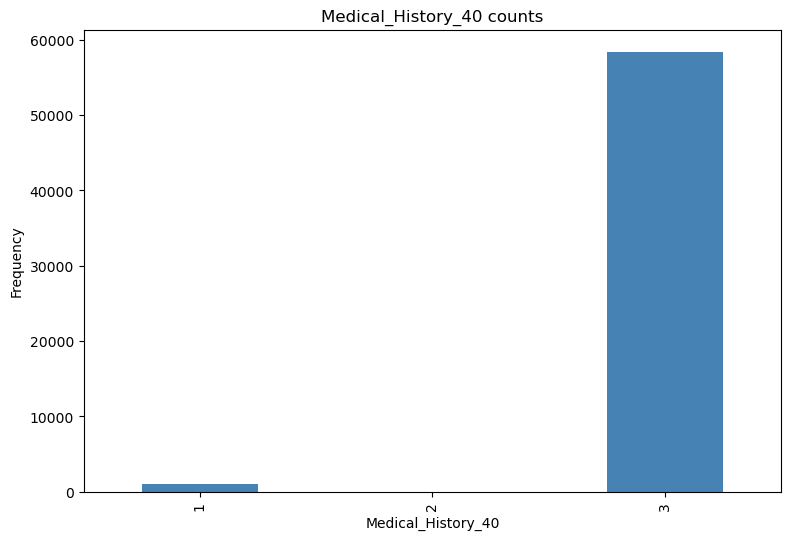

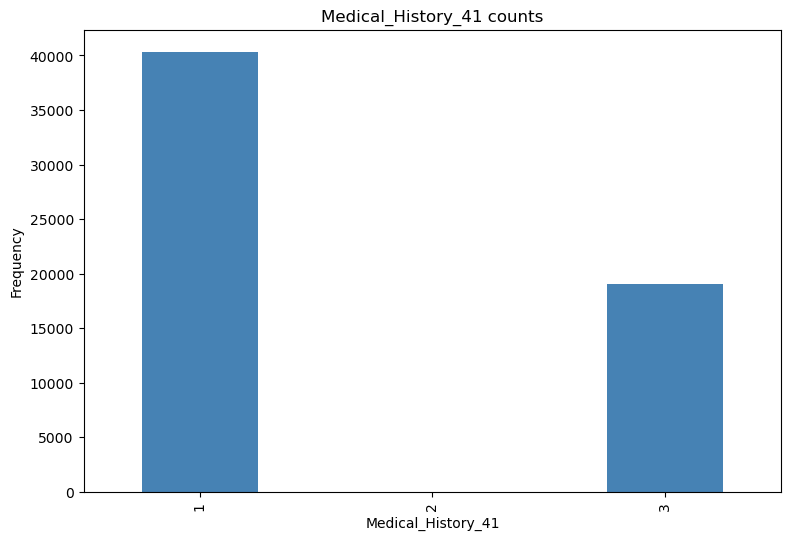

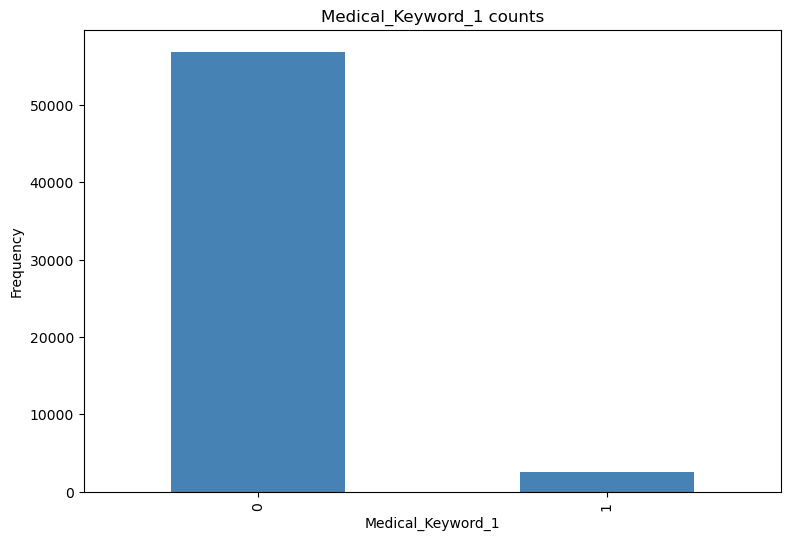

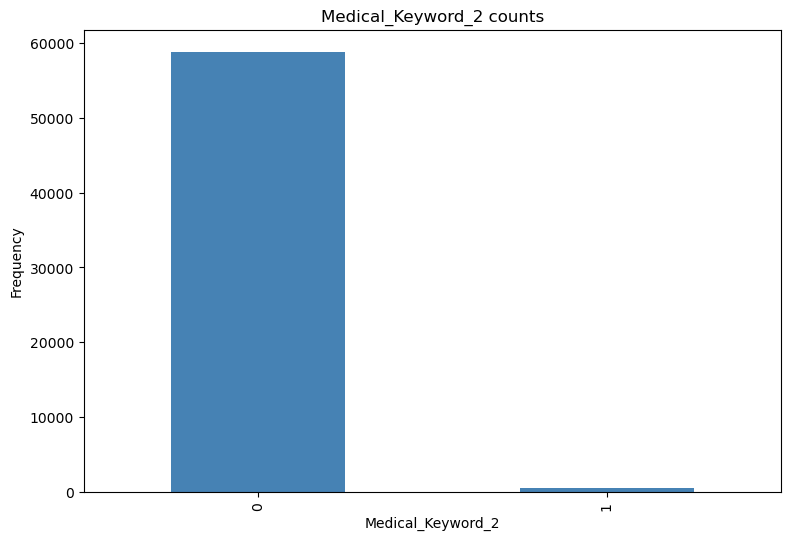

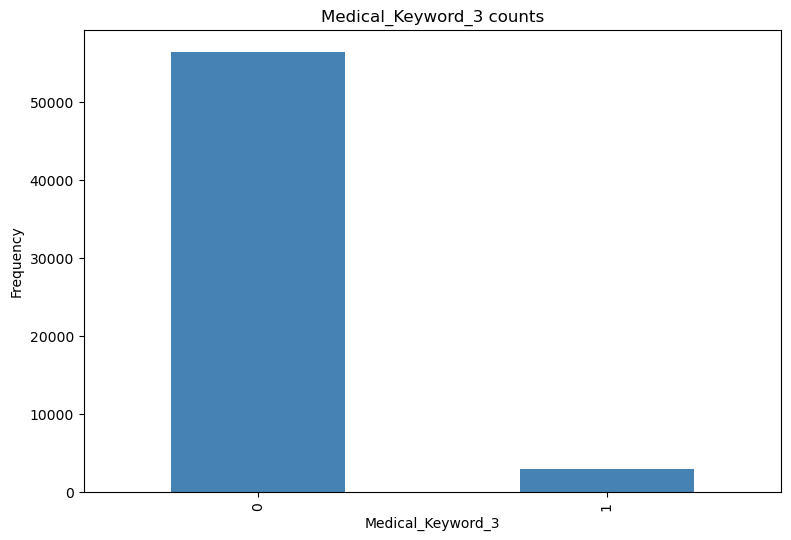

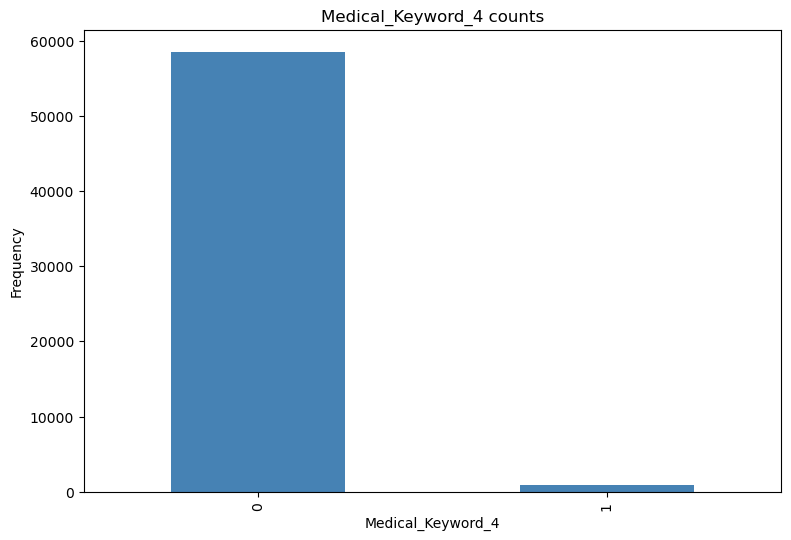

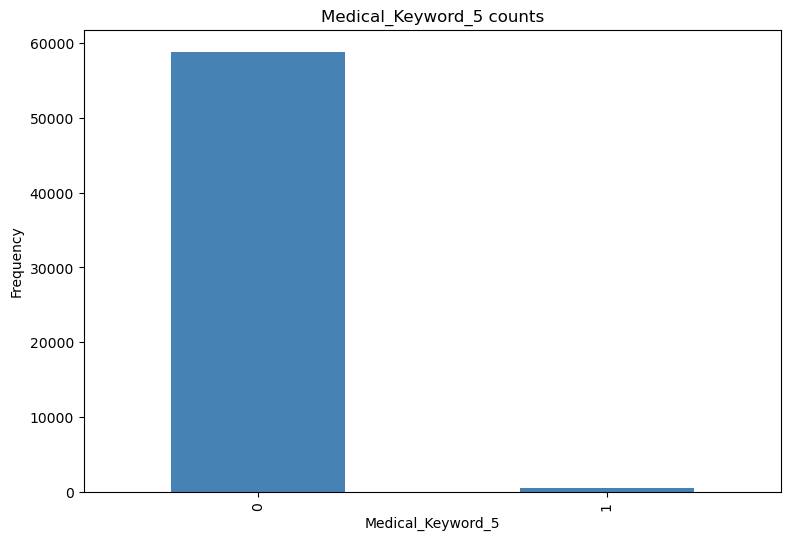

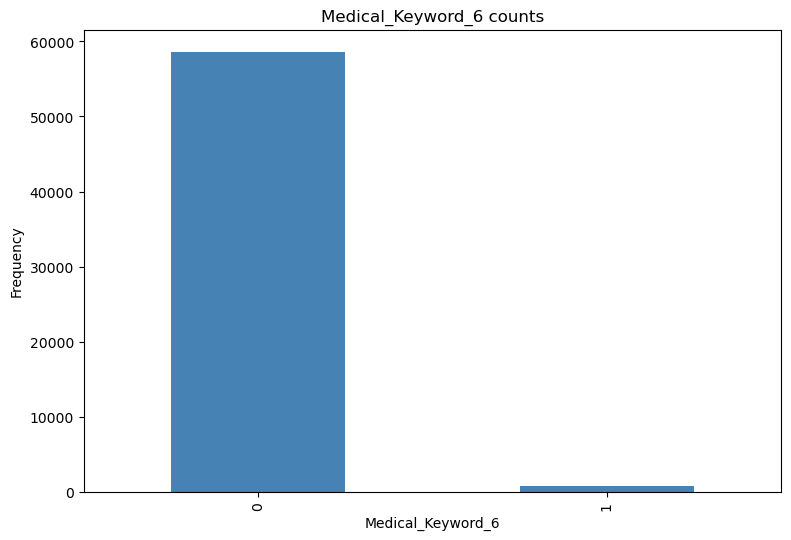

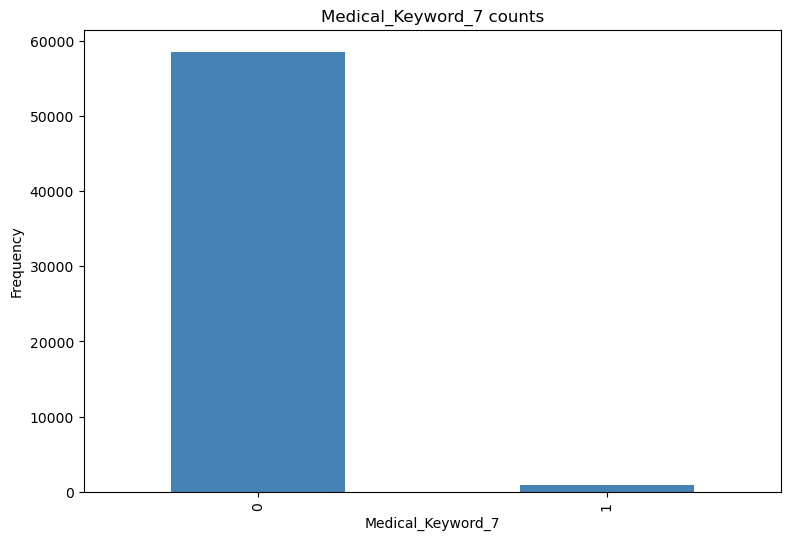

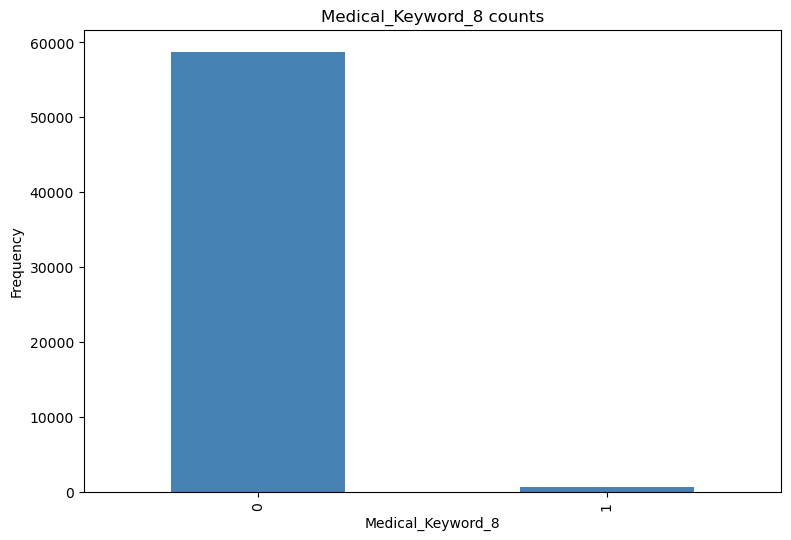

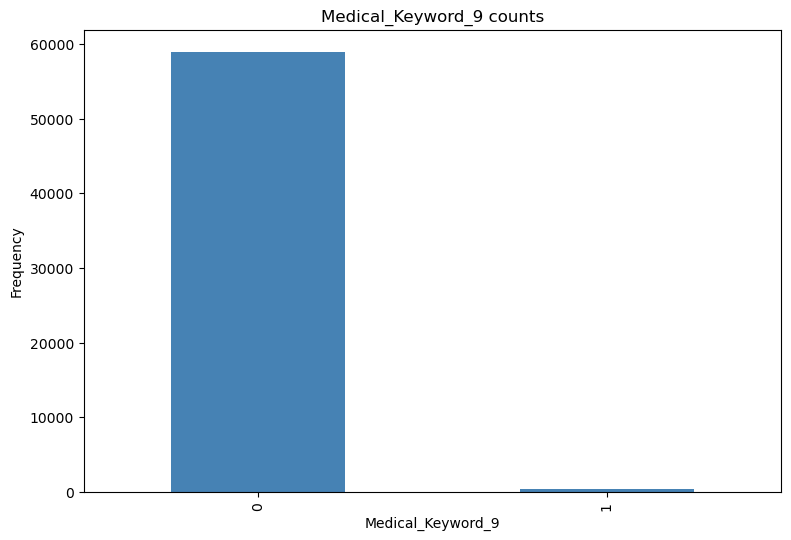

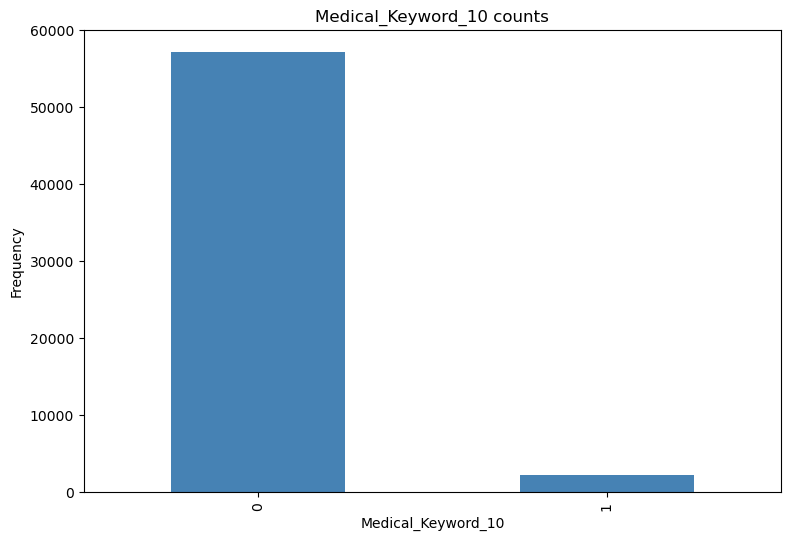

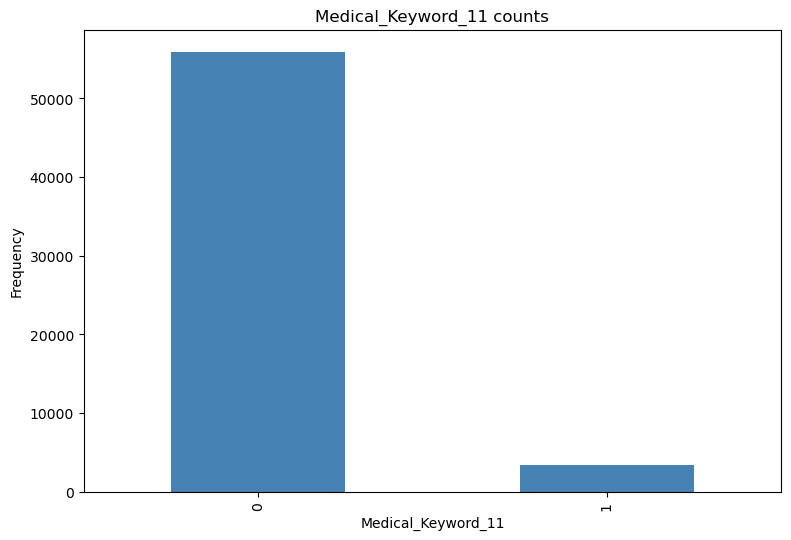

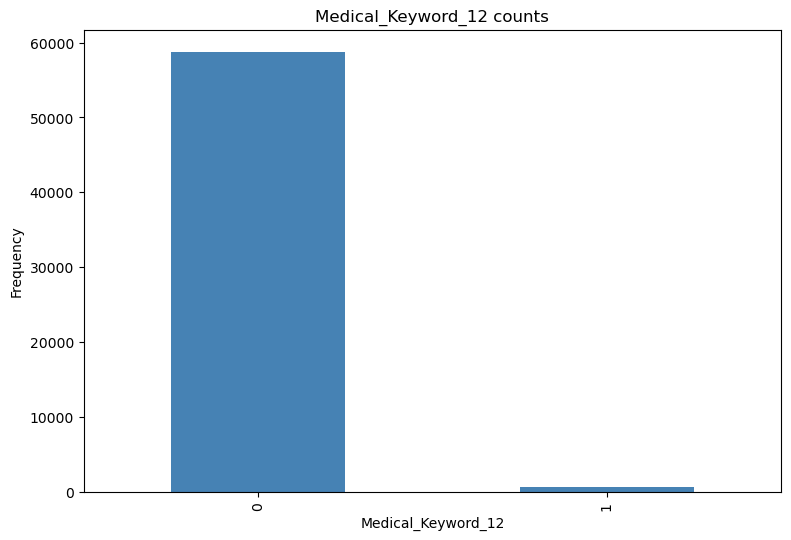

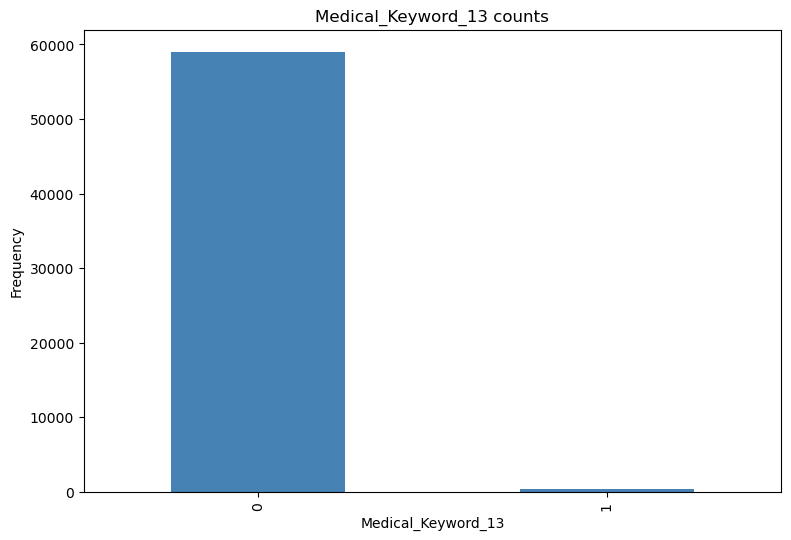

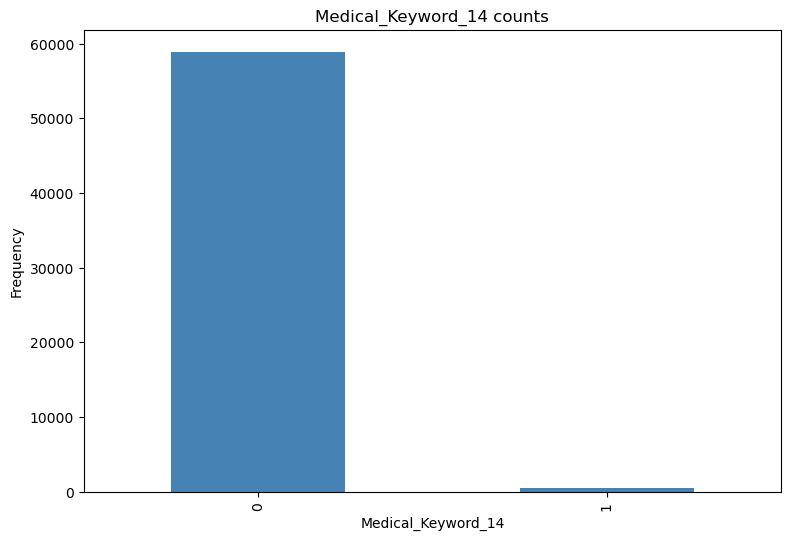

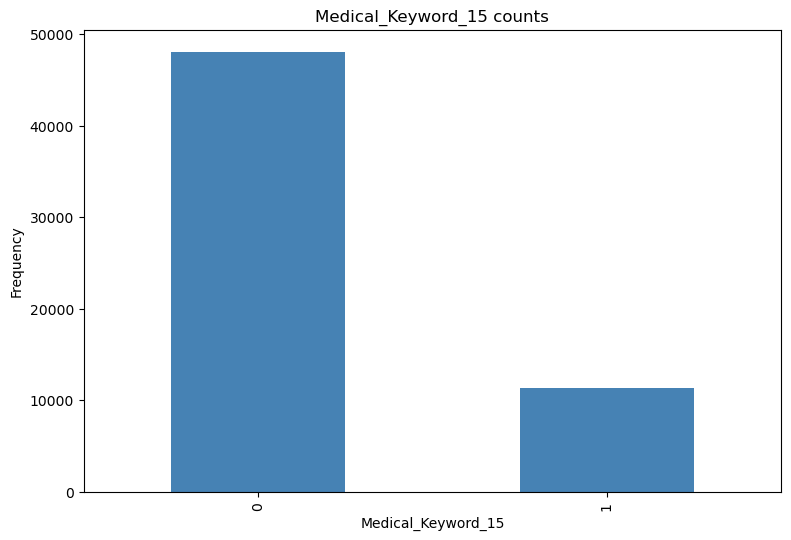

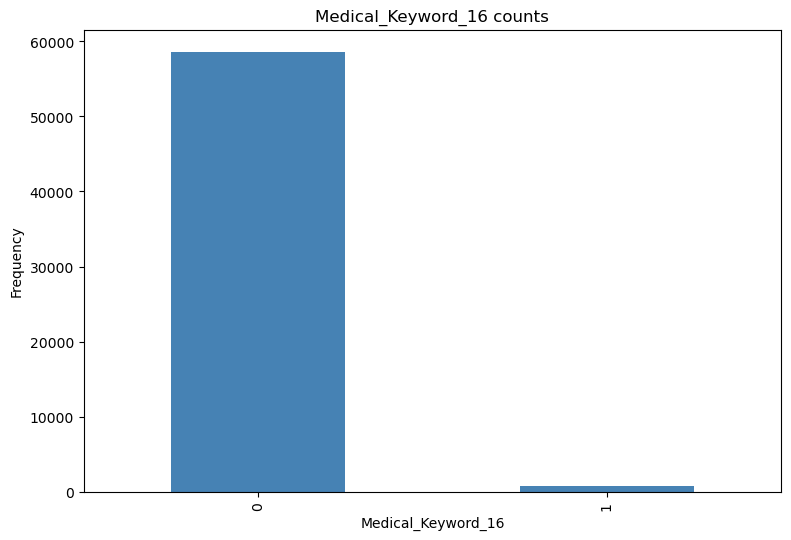

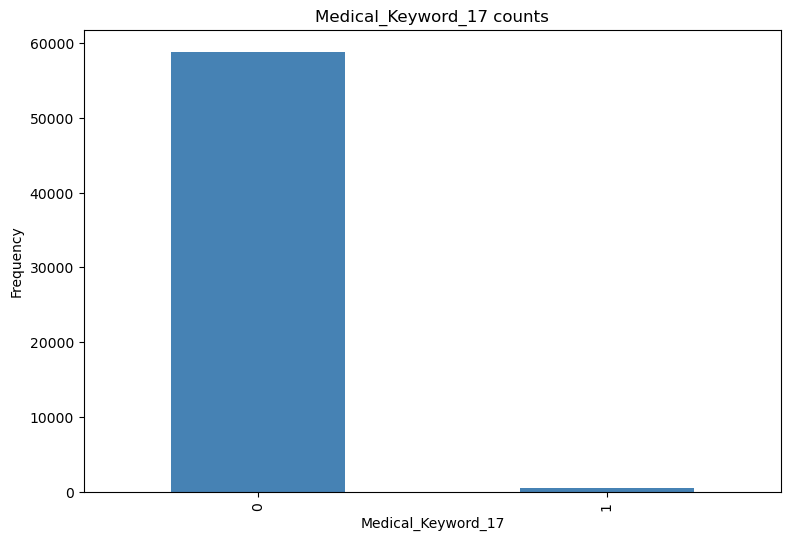

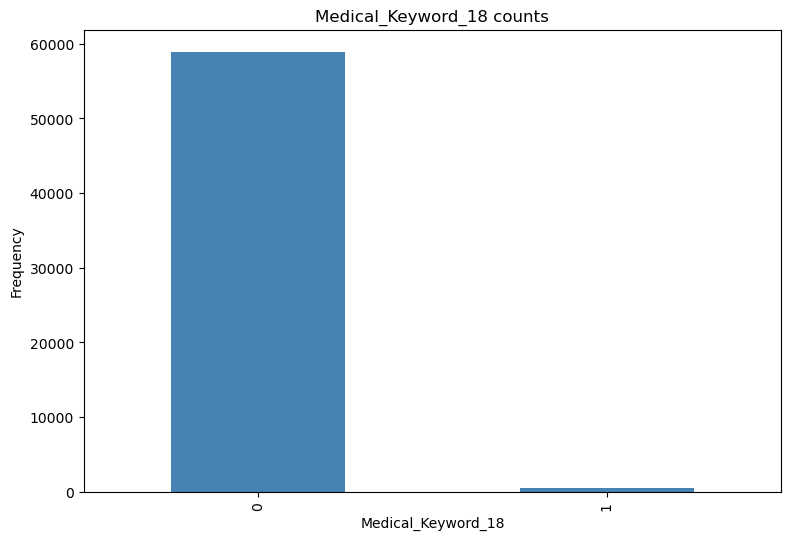

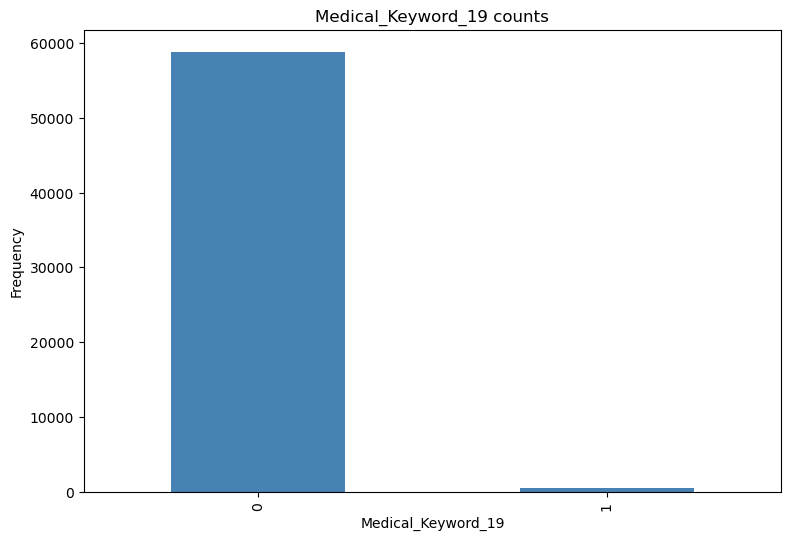

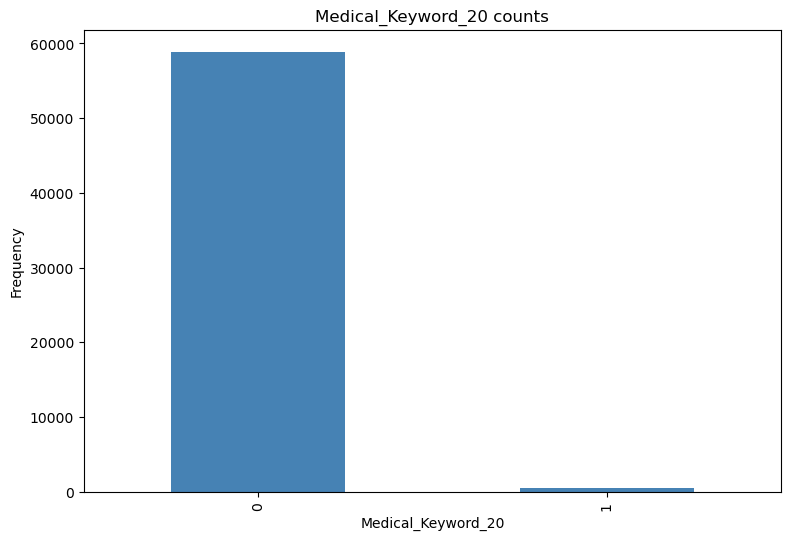

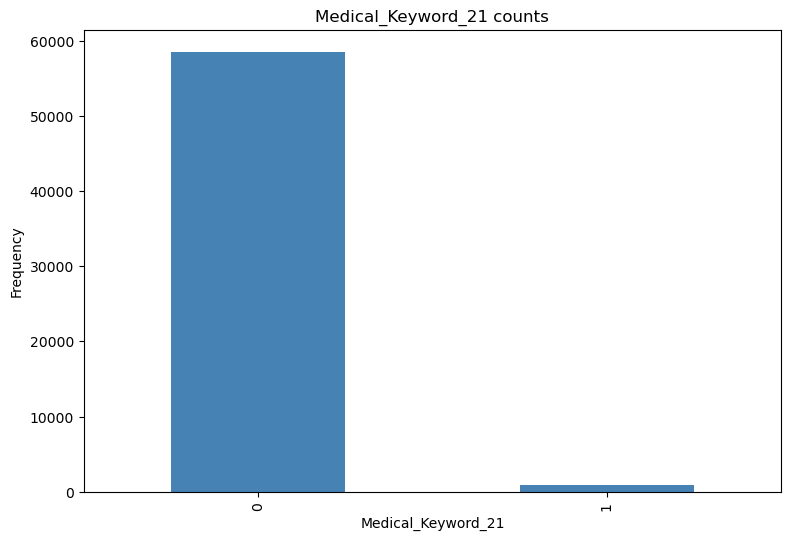

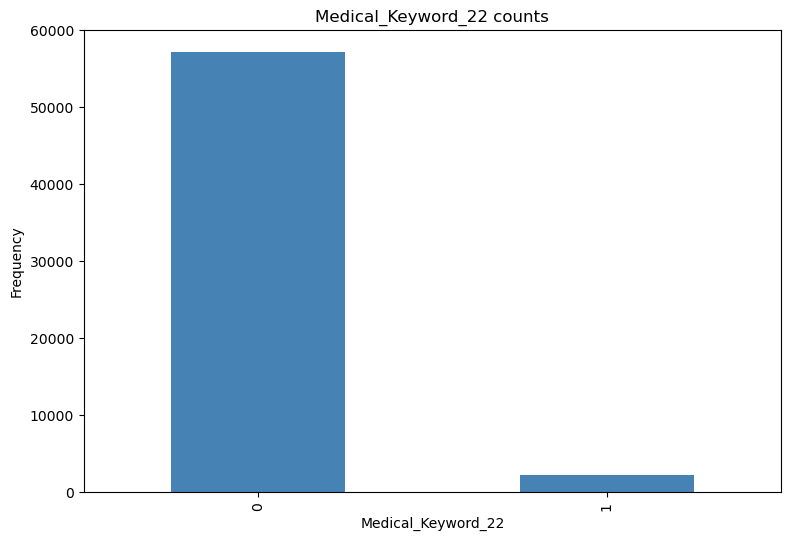

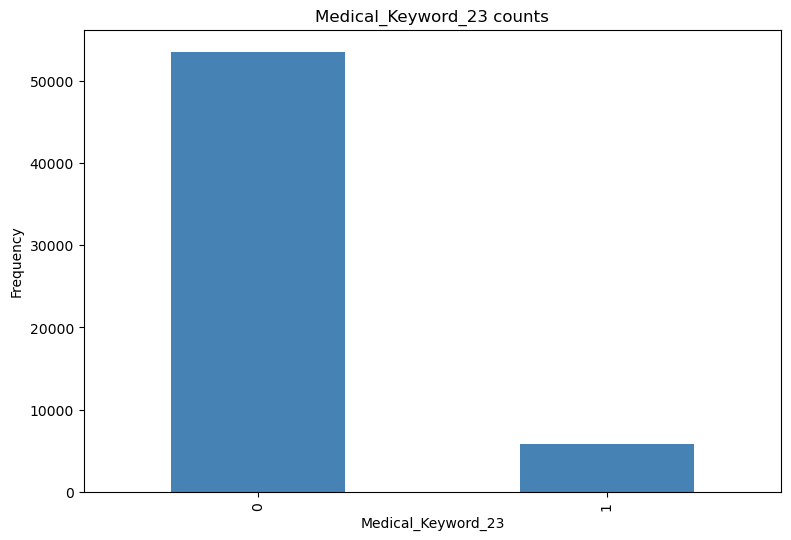

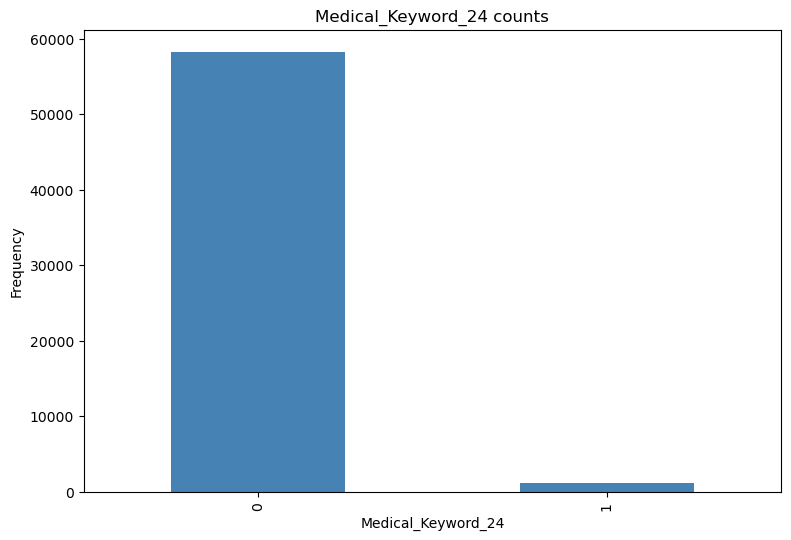

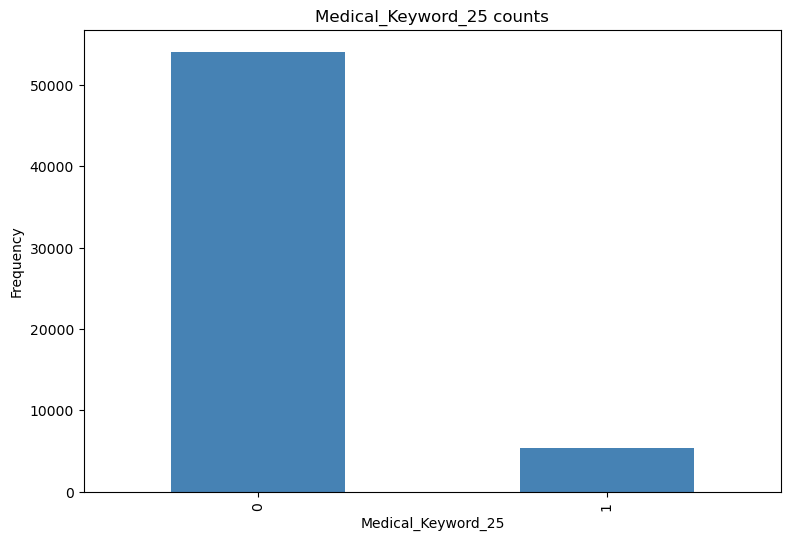

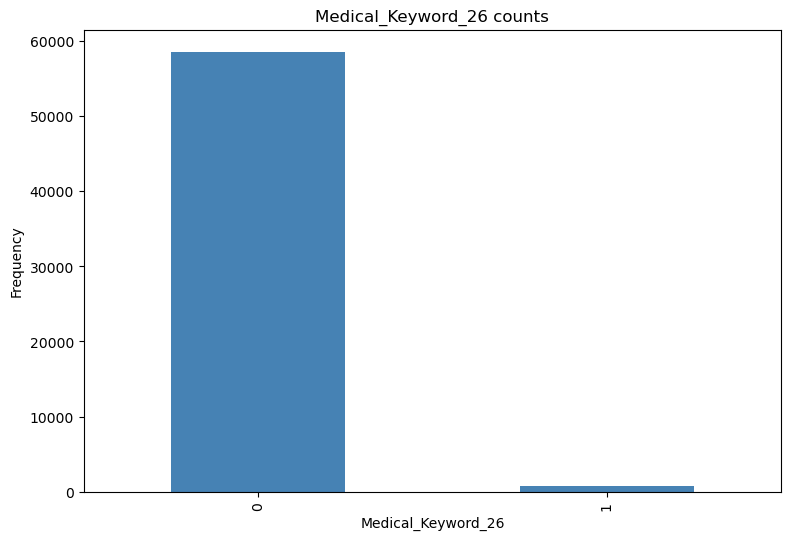

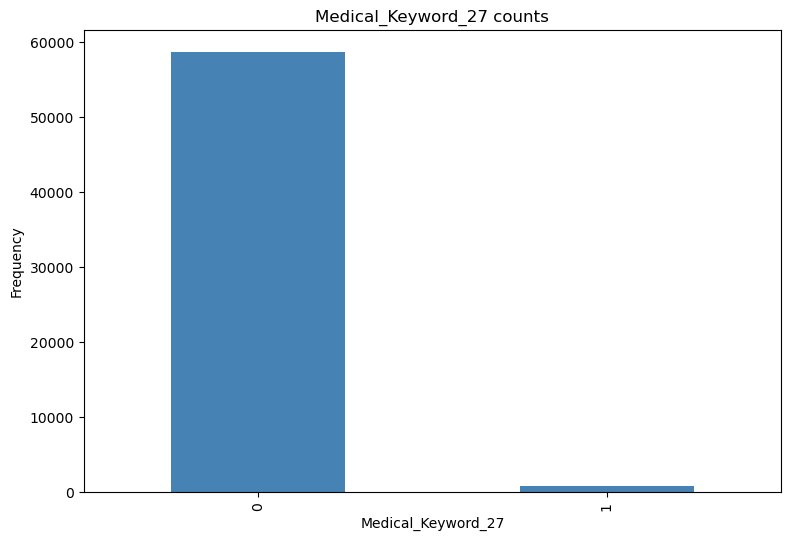

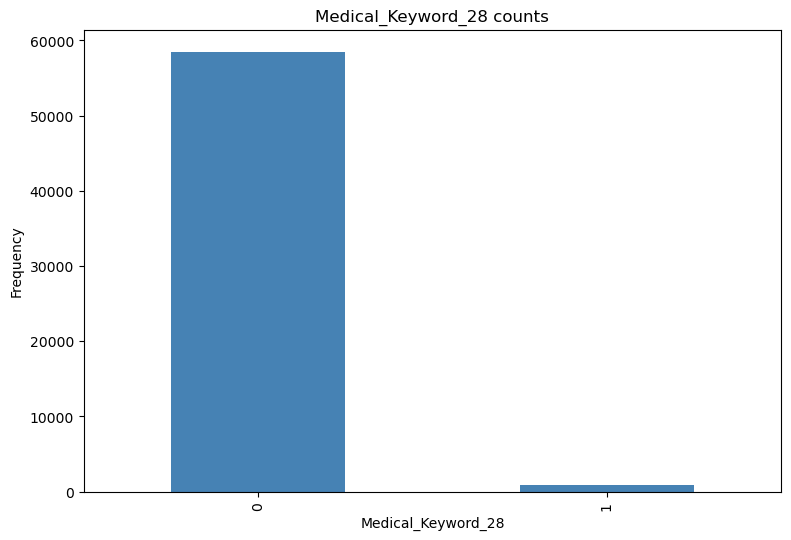

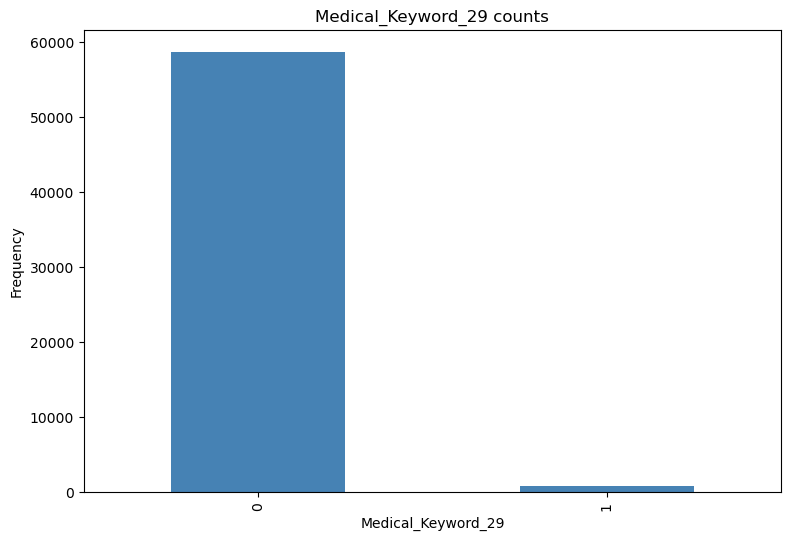

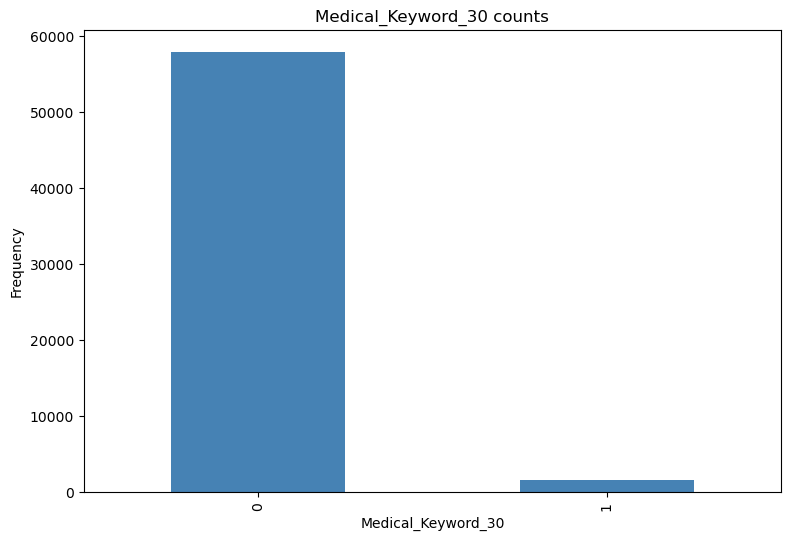

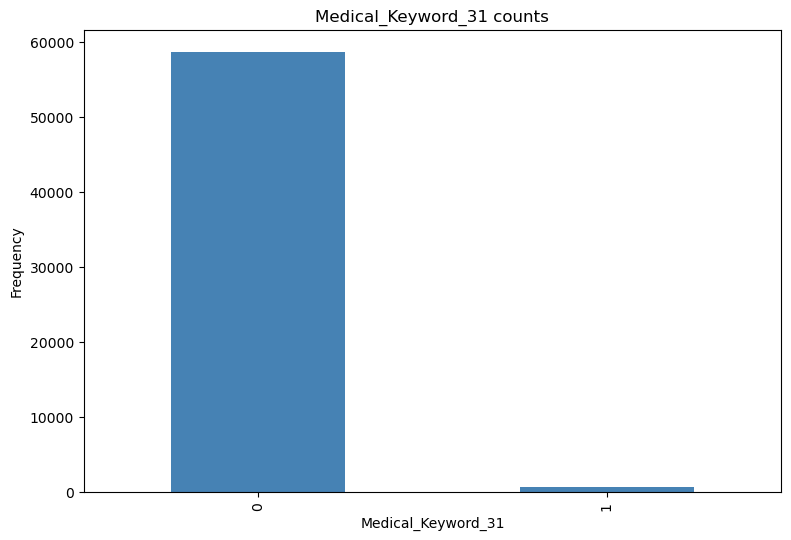

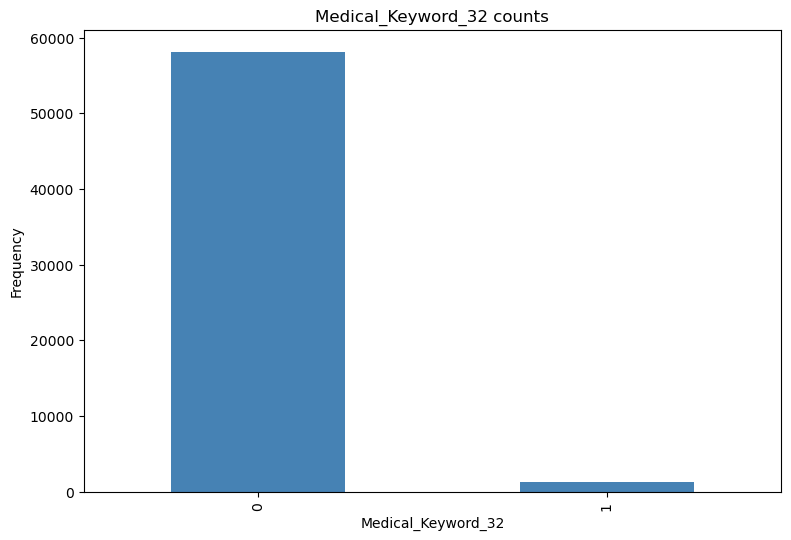

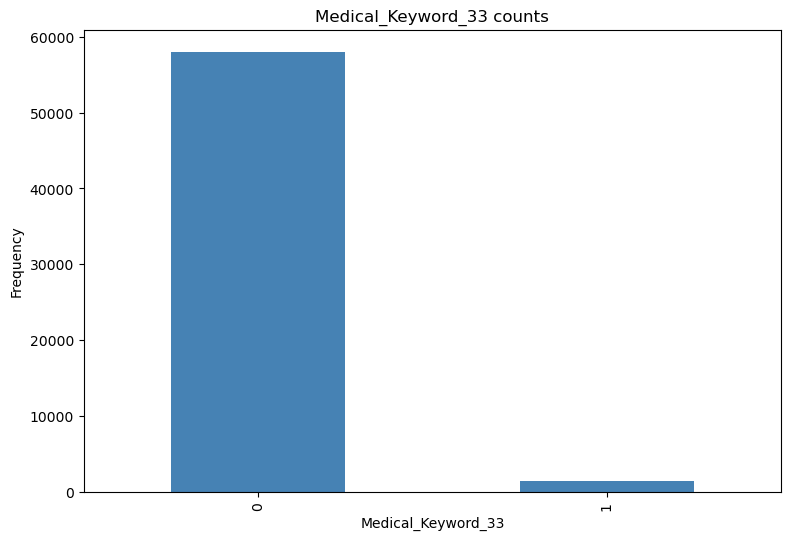

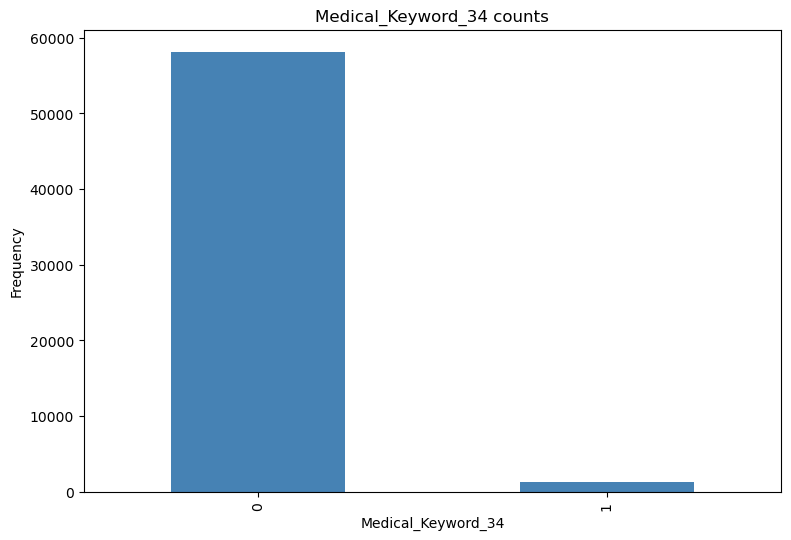

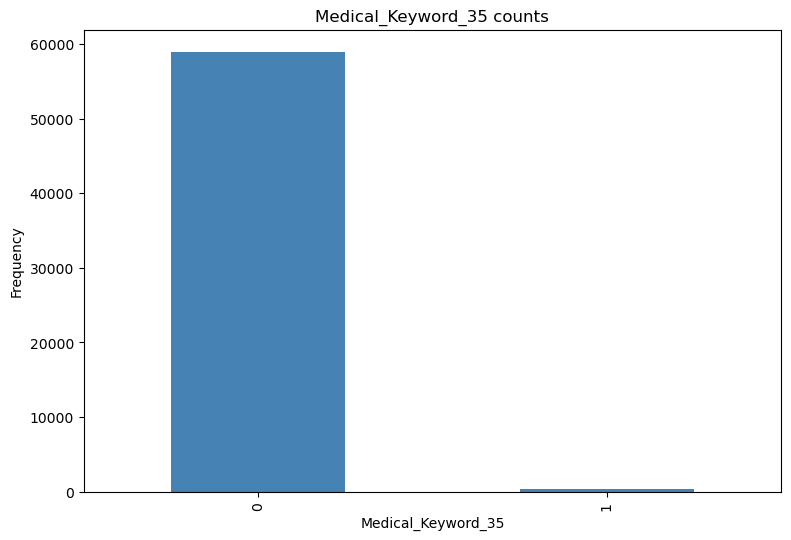

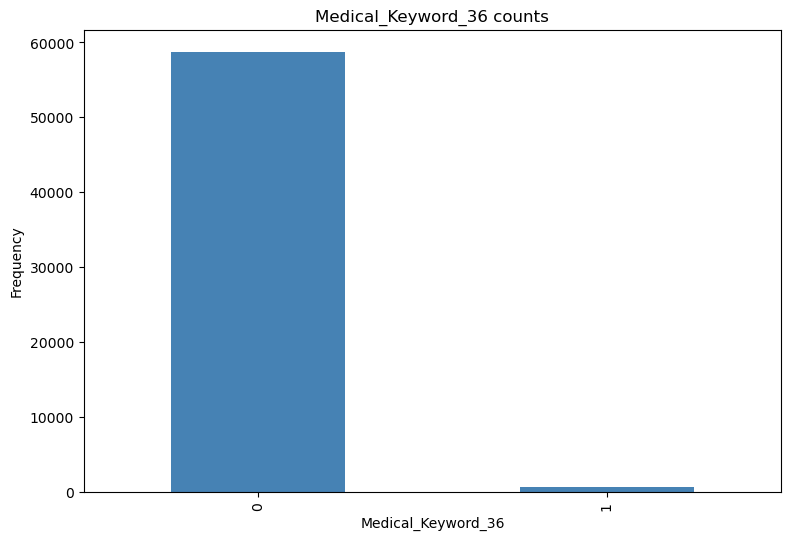

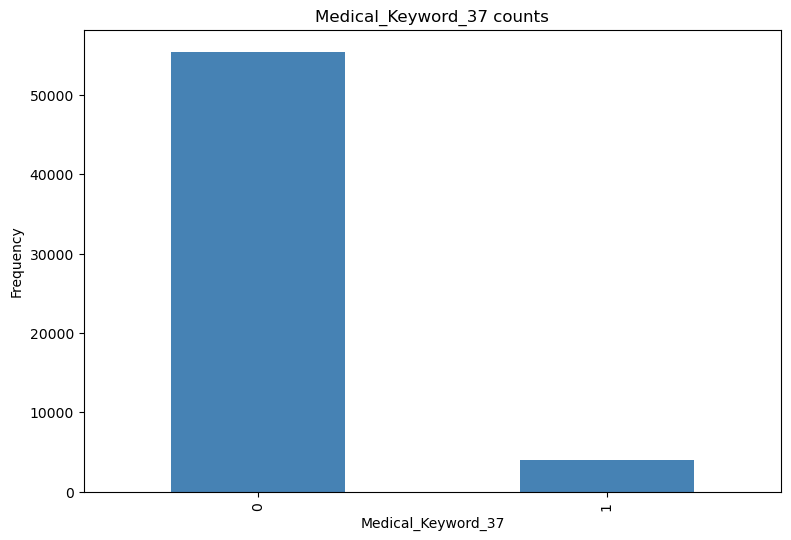

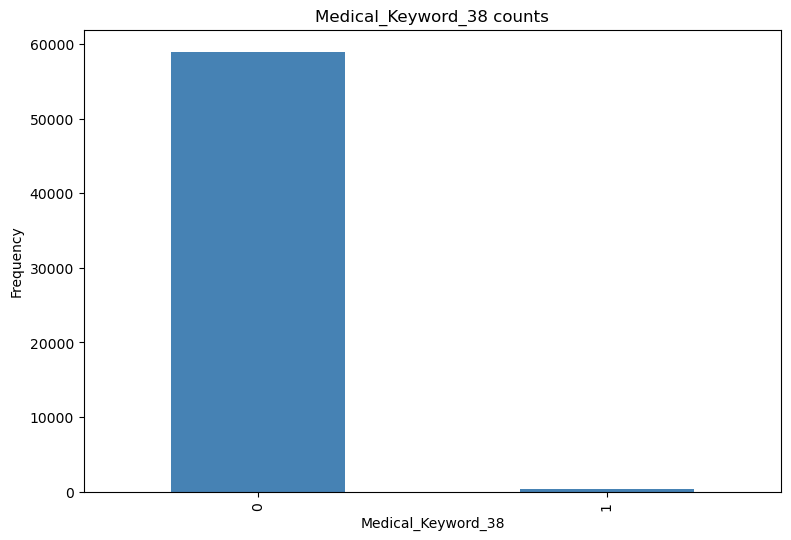

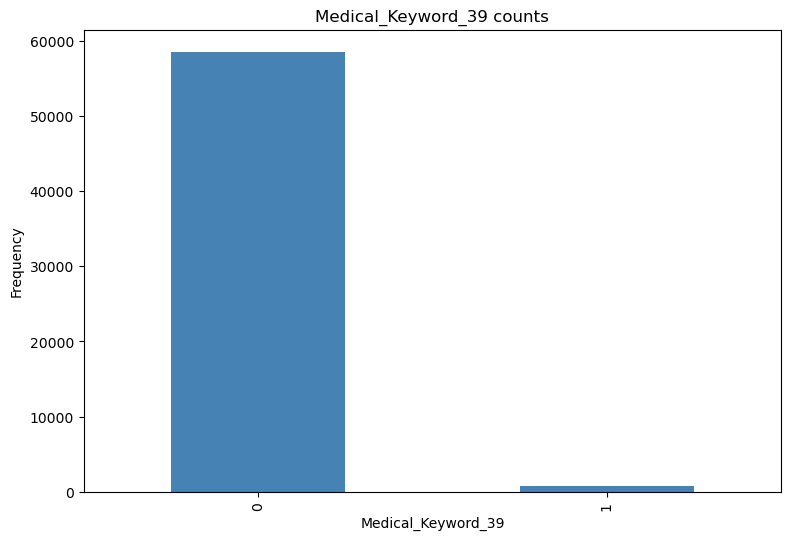

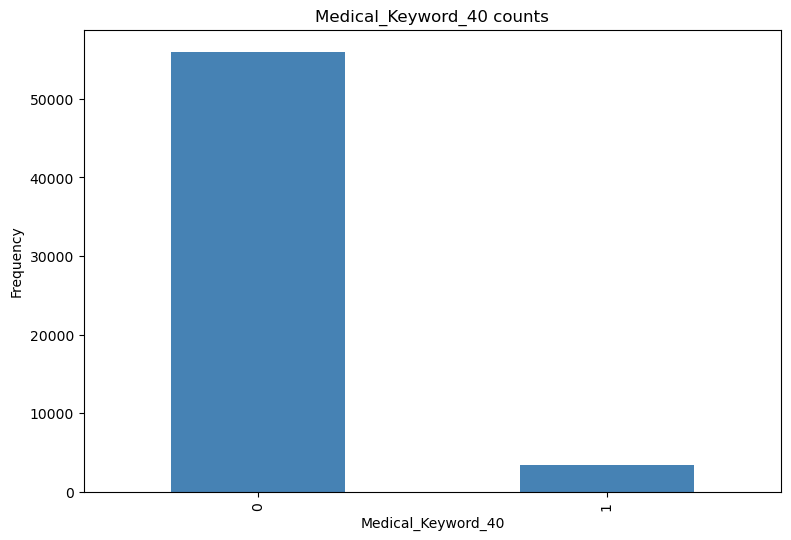

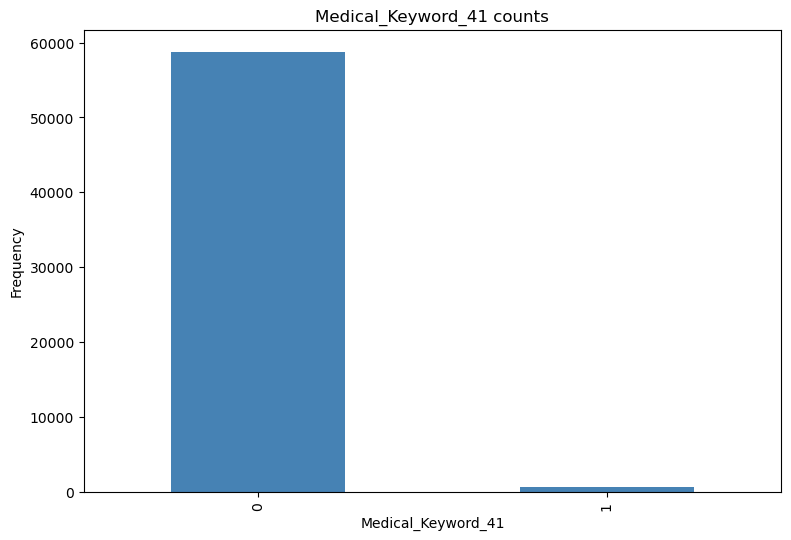

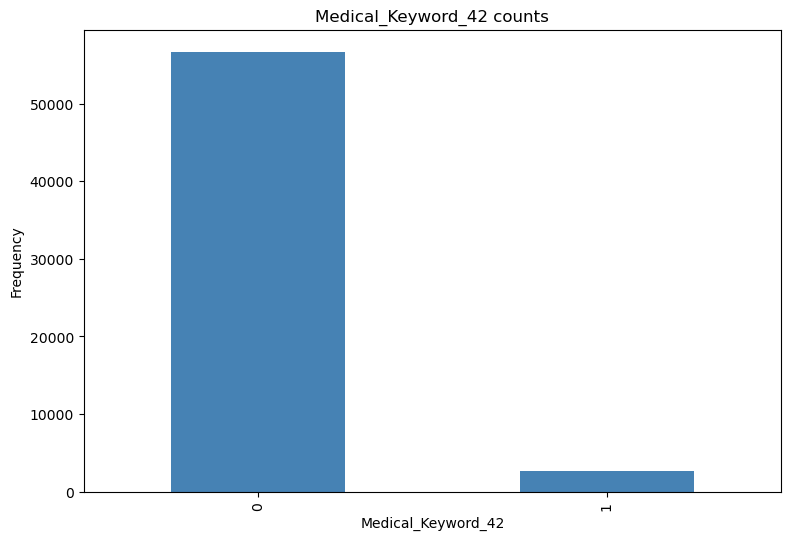

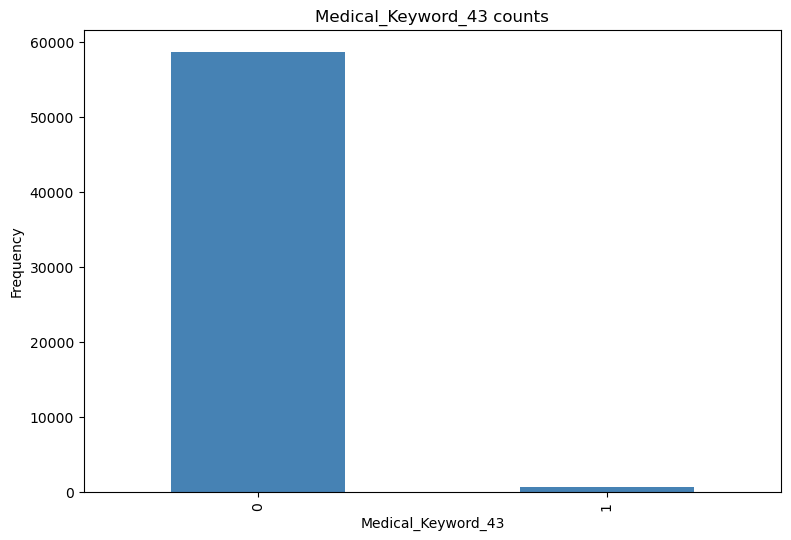

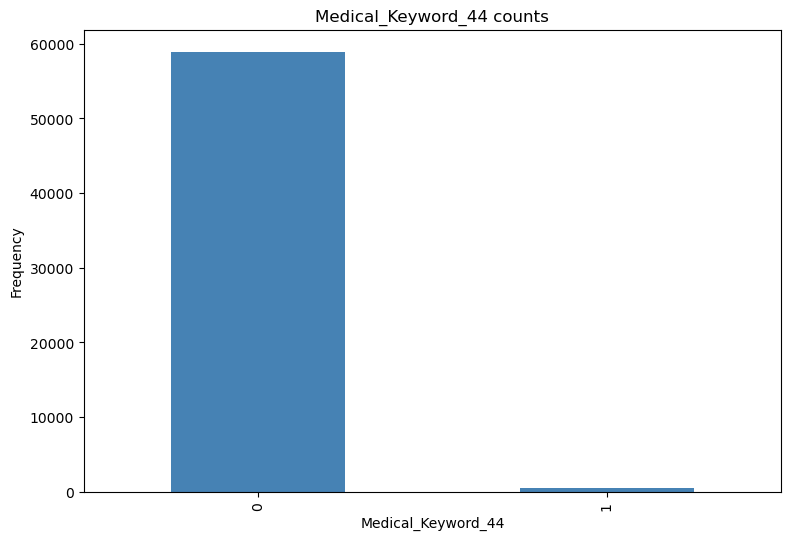

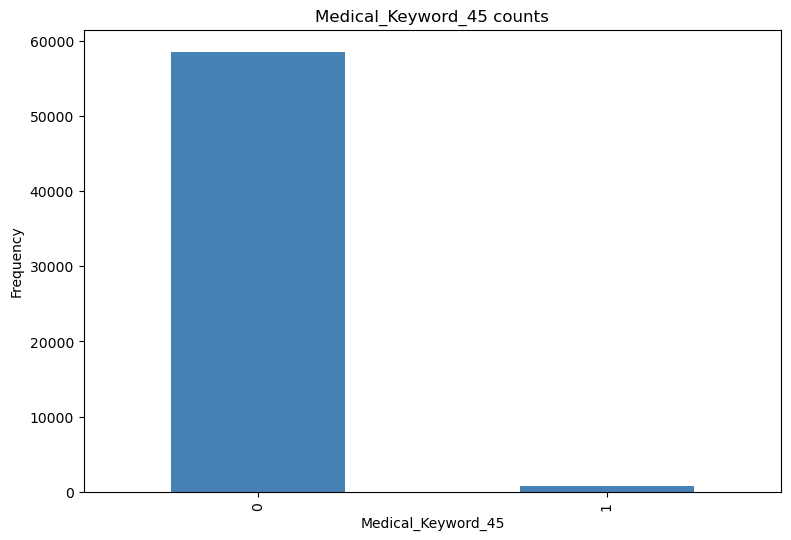

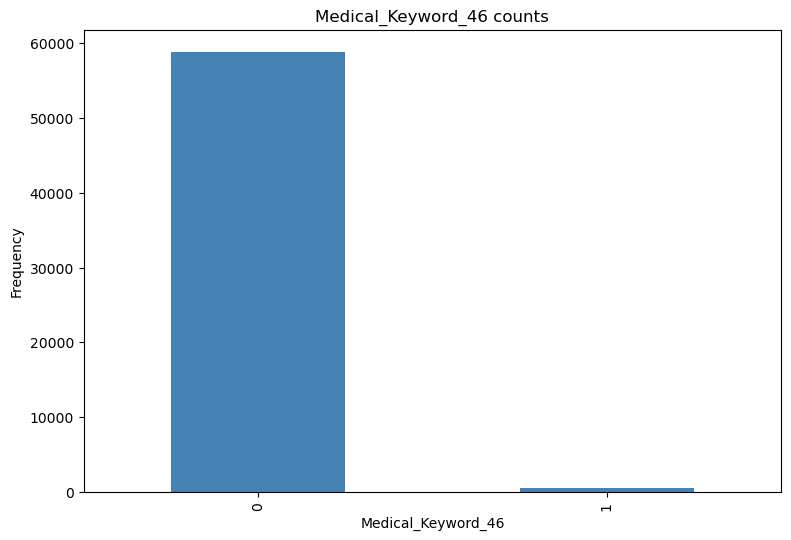

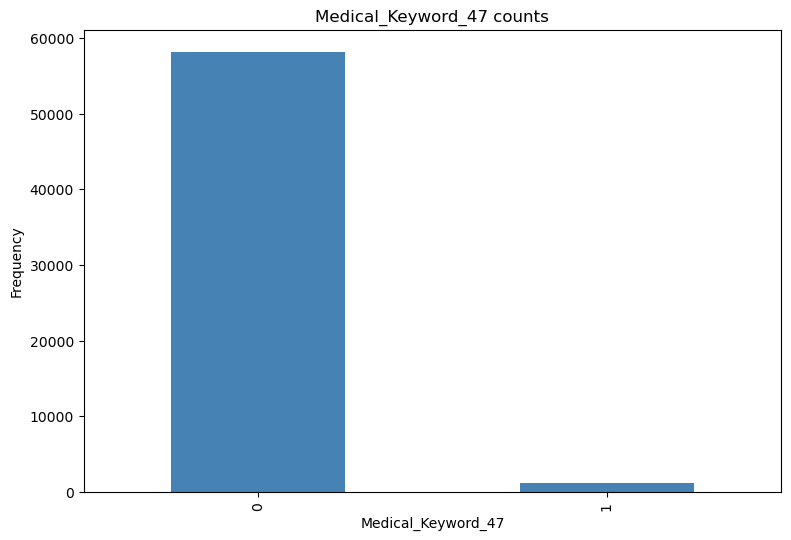

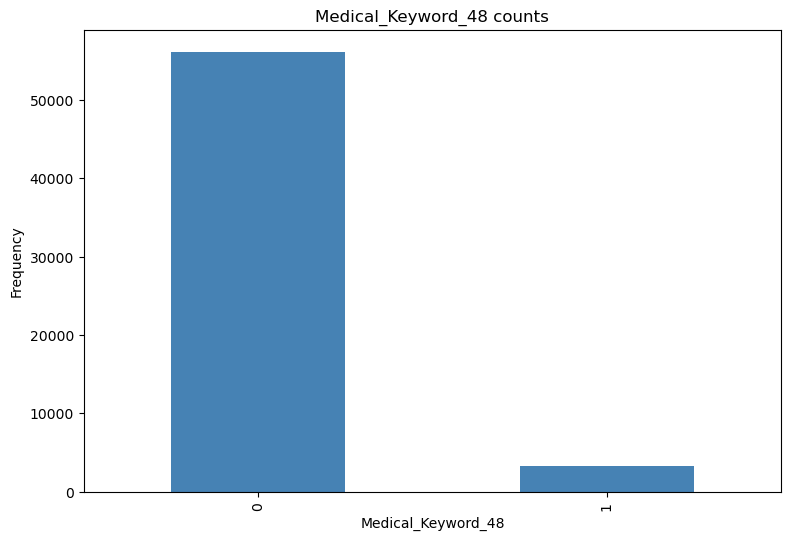

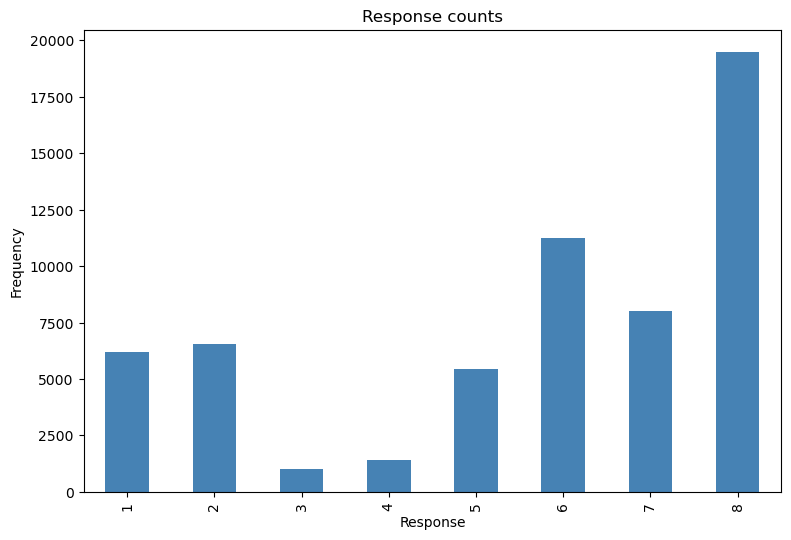

In [11]:
# Doing count plots for categorical
for col in categorical:
    counts = insurance_df[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(30, 10))
    elif len(counts) >50 :
      continue
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

> **D3 has the highest frequencies**

> Most of the features here are unbalanced.

<Axes: >

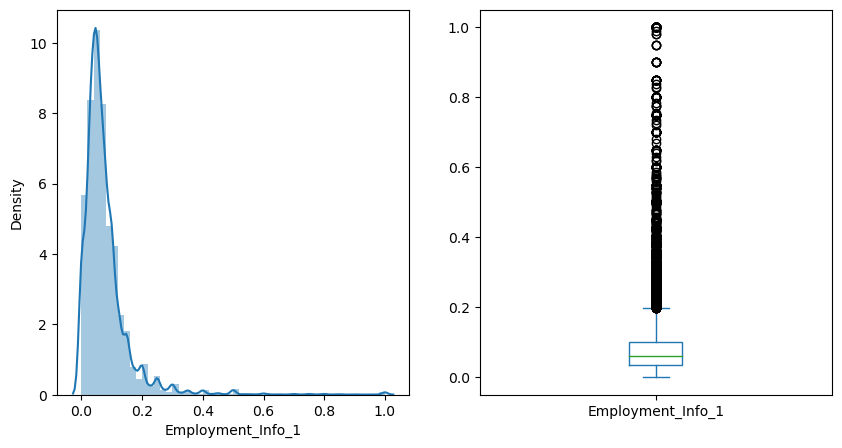

In [12]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_1'], ax=axes[0])
insurance_df['Employment_Info_1'].plot.box()

> Right skewed.

> Outliers can be seen.

<Axes: >

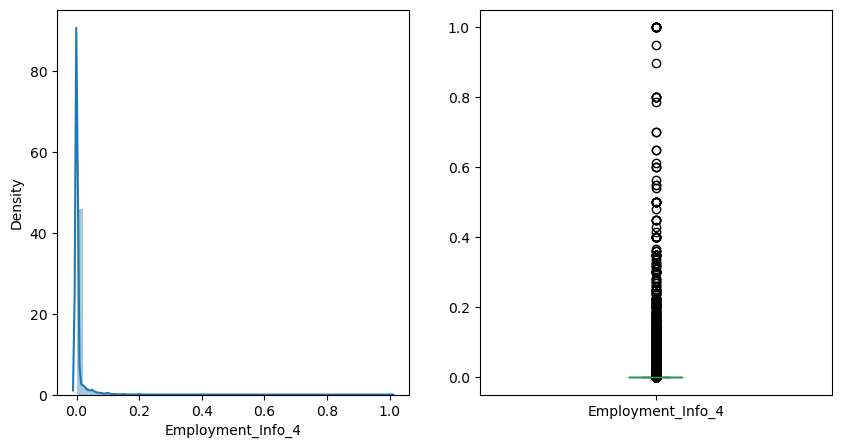

In [13]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_4'], ax=axes[0])
# sns.boxplot(insurance_df['Employment_Info_4'], ax=axes[1])
insurance_df['Employment_Info_4'].plot.box()

KeyError: 0

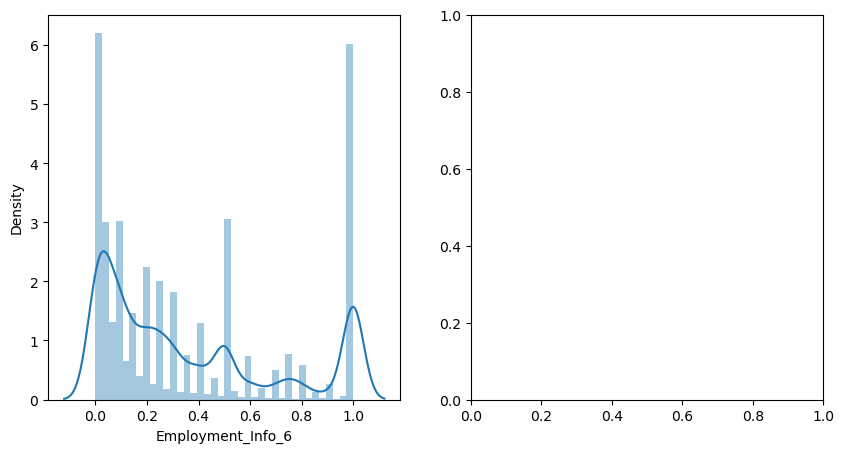

In [14]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_6'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_6'], ax=axes[1])

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Family_Hist_4'], ax=axes[0])
sns.boxplot(insurance_df['Family_Hist_4'], ax=axes[1])

# **Checking Correlation For Features greater than .8**

In [15]:
# I just checked correlated feature with greater than .8 here 
corr = insurance_df.corr()
corr_greater_than_80 = corr[corr>=.8]
corr_greater_than_80


,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Product_Info_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Medical_Keyword_46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Medical_Keyword_47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Medical_Keyword_48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


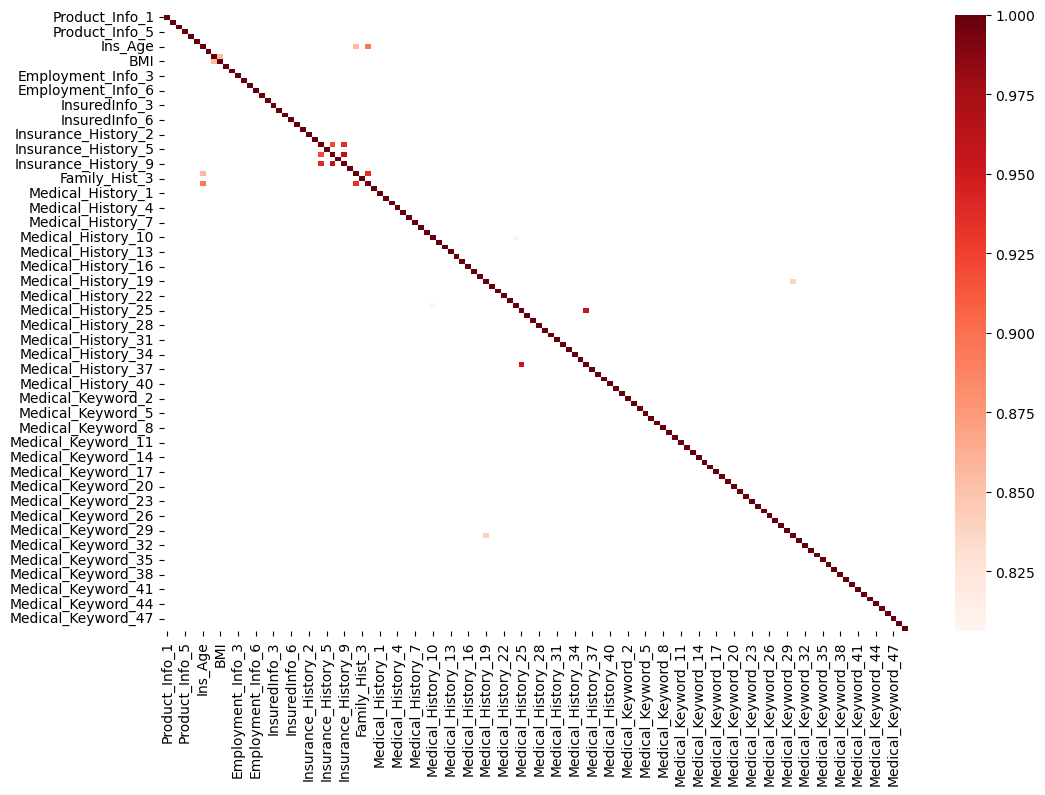

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_80, cmap="Reds");

### **CONCLUSION**

> BMI and Weight are highly correlated, which makes sense also as these 2 features are directly proprtional.

> Ins_Age and Family_Hist_4, Family_Hist_2 highly correlated

> Although, I am not going to perform any transformation on any feature or drop any as these are tree based models and they don't get affected by correlation much because of their non parametric nature.

In [17]:
#setting max columns to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# **Null Value Check**

In [18]:
#checking percentage of missing values in a column
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


# **Removing unimportant column**

In [19]:
# Dropping all columns in which greater than 40 percent null values
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,axis=1)
# insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)

In [20]:
# Does not contain important information
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

# **X and Y split**

In [21]:
# Data for all the independent variables
X = insurance_df.drop(labels='Response',axis=1)

# Data for the dependent variable
Y = insurance_df['Response']

# **Filling Remaining Missing Values**

In [22]:
# Filling remaining missing values with mean
X = X.fillna(X.mean())

# **Train Test Split**

In [23]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

# **Shapes of Train and Test Data**

In [24]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


# REGRESSIONNNNNNNNNNNNNNNNNNNNNNN

In [25]:
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

def eval_reg(y_pred, model):

    rmse = mean_squared_error(Y_test, y_pred, squared=False)
    mse = mean_squared_error(Y_test, y_pred, squared=True)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    return pd.DataFrame({'rmse':rmse,'mse':mse,'mae':mae,'r2':r2}, [model])


# from sklearn.metrics import make_scorer


from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge



def grid_search(model, parameters, X_train, Y_train):
    #Doing a grid
    grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       scoring = {'rmse':'neg_root_mean_squared_error',
                                  'mae':'neg_mean_squared_error',
                                  'mae':'neg_mean_absolute_error',
                                  'r2':'r2'},
                        refit='mae',
                       cv = 5, verbose=2)
    #Fitting the grid 
    grid.fit(X_train,Y_train)
    print()
    print()
    # Best model found using grid search
    optimal_model = grid.best_estimator_
    print('Best parameters are: ')
    pprint( grid.best_params_)

    return optimal_model


## RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Hyperparameter Grid
rf_parameters = {'max_depth' : [int(x) for x in np.linspace(5, 60, num = 4)] + [None],
              'min_samples_split' :  [2, 5],
              'min_samples_leaf' :  [1, 2],
              'n_estimators' : [300]}

pprint(rf_parameters)

#finding the best model
rf_optimal_model = grid_search(RandomForestRegressor(), rf_parameters, X_train, Y_train)
rf_optimal_model

{'max_depth': [5, 23, 41, 60, None],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [300]}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  29.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  29.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  29.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  29.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  29.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  29.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  29.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  29.8s
[CV] END max_depth

In [87]:
y_pred_rf = rf_optimal_model.predict(X_test)
eval_reg(y_pred_rf, rf_optimal_model)

rmse       mse  \
(DecisionTreeRegressor(max_depth=23, max_featur...  1.957798  3.832974   

                                                         mae        r2  
(DecisionTreeRegressor(max_depth=23, max_featur...  1.482988  0.372044

## XGB

In [26]:
from xgboost import XGBRegressor

In [28]:
# Parameter grid for xgboost
xgb_parameters = {'max_depth': [3,5,8], 
                  'min_child_weight':[6,9],
                 'n_estimators' : [100],
                 'reg_alpha':[1e-5, 0.1],
                 'subsample':[i/10.0 for i in range(7,9)],
                 'colsample_bytree':[i/10.0 for i in range(7,9)],
                 'gamma':[i/10.0 for i in range(1,4)],
                 'learning_rate': [.001, .01 , .1]}

pprint(xgb_parameters)

#finding the best model
xgb_optimal_model = grid_search(XGBRegressor(), xgb_parameters, X_train, Y_train)
xgb_optimal_model

{'colsample_bytree': [0.7, 0.8],
 'gamma': [0.1, 0.2, 0.3],
 'learning_rate': [0.001, 0.01, 0.1],
 'max_depth': [3, 5, 8],
 'min_child_weight': [6, 9],
 'n_estimators': [100],
 'reg_alpha': [1e-05, 0.1],
 'subsample': [0.7, 0.8]}
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, lear

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_b

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.5s
[CV] END c

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.5s
[CV] END colsamp

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gam

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_byt

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7,

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.9s
[CV] END colsa

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, g

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_byt

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, gam

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END c

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsamp

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7,

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.9s
[CV] END colsa

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.5s
[CV] END colsample

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gam

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.6s
[CV] END c

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=3, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.6s
[CV] END c

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.0s
[CV] END colsamp

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=100, reg_alpha=1e-05, subsample=0.8; total time=   1.0s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=6, n_estimators=100, reg_alpha=0.1, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, reg_alpha=1e-05, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.8, g

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred_xgb = xgb_optimal_model.predict(X_test)
eval_reg(y_pred_xgb, xgb_optimal_model)

In [33]:
eval_reg(y_pred_xgb, xgb_optimal_model)

,rmse,mse,mae,r2
"XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,\n importance_type='gain', interaction_constraints='',\n learning_rate=0.1, max_delta_step=0, max_depth=8,\n min_child_weight=6, missing=nan, monotone_constraints='()',\n n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,\n reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=0.8,\n tree_method='exact', validate_parameters=1, verbosity=None)",1.920819,3.689546,1.445193,0.395542


In [31]:
1+1

2

## Ridge

In [81]:
from sklearn.linear_model import Rigde
    
ridge_parameteters={'alpha': (np.logspace(-8, 8, 100))}

pprint(ridge_parameteters)

#finding the best model
ridge_optimal_model = grid_search(Rigde(), ridge_parameteters, X_train, Y_train)
ridge_reg = eval_reg(ridge_optimal_model)
ridge_reg

ImportError: cannot import name 'Rigde' from 'sklearn.linear_model' (/home/dsadmin/.conda/envs/test_env/lib/python3.8/site-packages/sklearn/linear_model/__init__.py)

## Lasso

In [74]:
from sklearn.linear_model import Lasso

lasso_parameteters={
        'alpha': (np.logspace(-8, 8, 10))
}

pprint(lasso_parameteters)

#finding the best model
lasso_optimal_model = grid_search(Lasso(), lasso_parameteters, X_train, Y_train)
lasso_optimal_model

{'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1.17681195e-05,
       1.70735265e-05, 2.47707636e-05, 3.59381366e-05, 5.21400829e-05,
       7.56463328e-05, 1.09749877e-04, 1.59228279e-04, 2.31012970e-04,
       3.35160265e-04, 4.86260158e-04, 7.05480231e-04, 1.02353102e-03,
       1.48496826e-03, 2.15443469e-03, 3.12571585e-03, 4.53487851e-03,
       6.57933225e-03, 9.54548457e-03, 1.38488637e-02, 2.00923300e-02,
       2.91505306e-02, 4.22924287e-02, 6.13590727e-02, 8.90215085e-02,
       1.29154967e-01, 1.87381742e-01, 2.71858824e-01, 3.94420606e-01,
       5.72236766e-01, 8.30217568e-01, 1.20450354e+00, 1.74752840e+00,
       2.53536449e+00, 3.67837977e+00, 5.33669923e+00, 7.74263683e+

[CV] END ........................alpha=2.656087782946684e-06; total time=   1.4s
[CV] END ........................alpha=3.853528593710536e-06; total time=   1.3s
[CV] END ........................alpha=3.853528593710536e-06; total time=   1.2s
[CV] END ........................alpha=3.853528593710536e-06; total time=   1.1s
[CV] END ........................alpha=3.853528593710536e-06; total time=   1.2s
[CV] END ........................alpha=3.853528593710536e-06; total time=   1.2s
[CV] END ........................alpha=5.590810182512223e-06; total time=   1.2s
[CV] END ........................alpha=5.590810182512223e-06; total time=   1.1s
[CV] END ........................alpha=5.590810182512223e-06; total time=   1.0s
[CV] END ........................alpha=5.590810182512223e-06; total time=   1.1s
[CV] END ........................alpha=5.590810182512223e-06; total time=   1.2s
[CV] END ........................alpha=8.111308307896873e-06; total time=   1.1s
[CV] END ...................

[CV] END .........................alpha=0.006579332246575682; total time=   0.1s
[CV] END .........................alpha=0.006579332246575682; total time=   0.1s
[CV] END .........................alpha=0.009545484566618348; total time=   0.1s
[CV] END .........................alpha=0.009545484566618348; total time=   0.1s
[CV] END .........................alpha=0.009545484566618348; total time=   0.1s
[CV] END .........................alpha=0.009545484566618348; total time=   0.1s
[CV] END .........................alpha=0.009545484566618348; total time=   0.1s
[CV] END .........................alpha=0.013848863713938746; total time=   0.1s
[CV] END .........................alpha=0.013848863713938746; total time=   0.1s
[CV] END .........................alpha=0.013848863713938746; total time=   0.1s
[CV] END .........................alpha=0.013848863713938746; total time=   0.1s
[CV] END .........................alpha=0.013848863713938746; total time=   0.1s
[CV] END ...................

[CV] END ...........................alpha=16.297508346206467; total time=   0.1s
[CV] END ...........................alpha=16.297508346206467; total time=   0.1s
[CV] END ...........................alpha=16.297508346206467; total time=   0.1s
[CV] END ...........................alpha=23.644894126454073; total time=   0.1s
[CV] END ...........................alpha=23.644894126454073; total time=   0.1s
[CV] END ...........................alpha=23.644894126454073; total time=   0.1s
[CV] END ...........................alpha=23.644894126454073; total time=   0.1s
[CV] END ...........................alpha=23.644894126454073; total time=   0.1s
[CV] END ............................alpha=34.30469286314926; total time=   0.1s
[CV] END ............................alpha=34.30469286314926; total time=   0.1s
[CV] END ............................alpha=34.30469286314926; total time=   0.1s
[CV] END ............................alpha=34.30469286314926; total time=   0.1s
[CV] END ...................

[CV] END ............................alpha=27825.59402207126; total time=   0.1s
[CV] END ...........................alpha=40370.172585965665; total time=   0.1s
[CV] END ...........................alpha=40370.172585965665; total time=   0.1s
[CV] END ...........................alpha=40370.172585965665; total time=   0.1s
[CV] END ...........................alpha=40370.172585965665; total time=   0.1s
[CV] END ...........................alpha=40370.172585965665; total time=   0.1s
[CV] END ............................alpha=58570.20818056673; total time=   0.1s
[CV] END ............................alpha=58570.20818056673; total time=   0.1s
[CV] END ............................alpha=58570.20818056673; total time=   0.1s
[CV] END ............................alpha=58570.20818056673; total time=   0.1s
[CV] END ............................alpha=58570.20818056673; total time=   0.1s
[CV] END ............................alpha=84975.34359086472; total time=   0.1s
[CV] END ...................

[CV] END ............................alpha=68926121.04349709; total time=   0.1s
[CV] END ............................alpha=68926121.04349709; total time=   0.1s
[CV] END ............................alpha=68926121.04349709; total time=   0.1s
[CV] END ............................alpha=68926121.04349709; total time=   0.1s
[CV] END ..................................alpha=100000000.0; total time=   0.1s
[CV] END ..................................alpha=100000000.0; total time=   0.1s
[CV] END ..................................alpha=100000000.0; total time=   0.1s
[CV] END ..................................alpha=100000000.0; total time=   0.1s
[CV] END ..................................alpha=100000000.0; total time=   0.1s


Best parameters are: 
{'alpha': 1e-08}


Lasso(alpha=1e-08)

In [76]:
y_pred = lasso_optimal_model.predict(X_test)
eval_reg(y_pred, lasso_optimal_model)

,rmse,mse,mae,r2
Lasso(alpha=1e-08),2.00879,4.035237,1.564088,0.338907


## SVM

In [80]:
from sklearn.svm import SVR

svr_parameters = {'C': [100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

pprint(svr_parameters)

#finding the best model
svr_optimal_model = grid_search(SVR(), svr_parameters, X, Y)
svr_optimal_model

{'C': [0.1, 1, 10, 100],
 'gamma': [1, 0.1, 0.01, 0.001],
 'kernel': ['rbf', 'poly', 'sigmoid']}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 9.8min


KeyboardInterrupt: 

In [ ]:
y_pred_svm = svr_optimal_model.predict(X_test)
eval_reg(y_pred_svm, svr_optimal_model)

__________________

# **Random Forest**




In [ ]:
import types
# Modify predict_proba method
def rf_predict_proba(self, X):
    probas = self.predict_proba(X)
    if self.n_classes_ == 2:
        return np.hstack([1 - probas, probas])
    else:
        return probas

rf_optimal_model.predict_proba = types.MethodType(rf_predict_proba, rf_optimal_model)
rf_predict_proba

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score

# Train set
rf_train_accuracy = accuracy_score(Y_train, rf_optimal_model.predict(X_train))
rf_train_log = log_loss(Y_train, rf_optimal_model.predict_proba(X_train))
rf_f1 = f1_score(Y_train, rf_optimal_model.predict(X_train), average='macro')
rf_precision = precision_score(Y_train, rf_optimal_model.predict(X_train), average='macro')
rf_recall = recall_score(Y_train, rf_optimal_model.predict(X_train), average='macro')

# Test set
rf_test_accuracy = accuracy_score(Y_test, rf_optimal_model.predict(X_test))
rf_test_log = log_loss(Y_test, rf_optimal_model.predict_proba(X_test))
rf_f1 = f1_score(Y_test, rf_optimal_model.predict(X_test), average='macro')
rf_precision = precision_score(Y_test, rf_optimal_model.predict(X_test), average='macro')
rf_recall = recall_score(Y_test, rf_optimal_model.predict(X_test), average='macro')


## **Feature Importance For Random Forest**

In [ ]:
check_importance(rf_optimal_model, X_train)

## **Plotting only those features which are contributing something**


In [ ]:
# PLotting only those features which are contributing something
plot_feature_importance(rf_optimal_model, X_train)

### **CONCLUSION:**

> BMI, weight, Medical_History_23, Medical_History_4 and Medical_Keyword_15 seems to be important features according to random forest.

> Also, only these features are contributing to the model prediction. Some features can be elmininated which are not contributing on further investigation.

## **Model Interpretability For Random Forest**






### **Using Lime**

In [ ]:

# Interpreting a single data row
interpret_with_lime(rf_optimal_model,X_test)

### **Using Shap**

In [ ]:

# Interpretting the model using shaply
X_shap=X_train

rf_explainer = shap.TreeExplainer(rf_optimal_model)
rf_shap_values = rf_explainer.shap_values(X_shap)
shap.summary_plot(rf_shap_values, X_shap, plot_type="bar")

#### **Findings**

> medical history 23,  Wt, medical history 4 all pushing towards 7.

> Orange ones are pusing towards 1.

## **Dependence Plots**

In [ ]:
# Plotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Wt','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, rf_shap_values[0], X_train)

### **Findings**

> With high medical history 23 and low bmi we get class 1

# **Gradient Boosting**




In [ ]:
#finding the best model
gb_parameters ={
    "n_estimators":[5,50],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1]
}

pprint(gb_parameters)

gb_optimal_model = grid_search(GradientBoostingClassifier(), gb_parameters, X_train, Y_train)

## **Feature Importance For Gradient Boosting**

In [ ]:
# Getting feature importance
check_importance(gb_optimal_model, X_train)

In [ ]:
# Getting the scpres for all the score metrics used here
gb_model, gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_f1, gb_precision,gb_recall,gb_train_log, gb_test_log = check_scores(gb_optimal_model, X_train, X_test, Y_train, Y_test)

In [ ]:
# PLotting only those features which are contributing something
plot_feature_importance(gb_model, X_train)

#### **CONCLUSION:**

> BMI, weight, Medical_History_23, Medical_History_4 and Medical_Keyword_15, Product info 4 seems to be the most important 5 features according to Gradient boosting.


## **Model Interpretability For Gradient Boosting**

### **Using Lime**

In [ ]:
# Interpretting the model using lime
interpret_with_lime(gb_model,X_test)

In [ ]:

# Interpretting the model using shaply
X_shap=X_train

rf_explainer = shap.TreeExplainer(gb_model)
rf_shap_values = rf_explainer.shap_values(X_shap)
shap.summary_plot(rf_shap_values, X_shap, plot_type="bar")

### **Using Shap**

FALE NAM FEATURE IMPORTANCES  I DEPENDANCES ZA GRAD BOOSTING ZATO STO JE MULTICLASS

#### **Findings**
> BMI is pushing models prediction towards 0.

>Medical keyword 15 is pushing towards 1. However, medical keyword 4 is pushing towards 0.

> Also, according to feature plot Wt. was in top 5 most important features, same isn't followed here.

## **Dependence Plots**

In [ ]:
#PLotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Product_Info_4','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, gb_shap_values, X_train)

### **Findings**

> For low BMI and high medical history 23 we get class as 1.



# **XGBOOST**



In [ ]:
import numpy as np

# Check the unique values in y
unique_y = np.unique(Y_train)
print(unique_y)

# Map the unique values to the expected classes
expected_classes = [0, 1, 2, 3, 4, 5, 6, 7]
class_map = dict(zip(expected_classes, expected_classes))
if len(unique_y) != len(expected_classes) or not all(np.in1d(expected_classes, unique_y)):
    class_map = dict(zip(unique_y, expected_classes))

# Map y_train to the expected classes
Y_train_mapped = np.array([class_map[yi] for yi in Y_train])

In [ ]:
# Parameter grid for xgboost
xgb_parameters = {'max_depth': [1,3,5], 'n_estimators': [2,5,10], 'learning_rate': [.01 , .1, .5]}
print('XGB parameters areL:')
pprint(xgb_parameters)
#finding the best model
xgb_optimal_model = grid_search(XGBClassifier(), xgb_parameters, X_train, Y_train_mapped)




## **Feature Importance For XGBoost**

In [ ]:
# Getting the scores for all the score metrics used here
xgb_model, xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_f1, xgb_precision,xgb_recall,xgb_train_log, xgb_test_log= check_scores(xgb_optimal_model, X_train, X_test, Y_train,Y_test)

In [ ]:
# Getting feature importance

check_importance(xgb_optimal_model, X_train)

### **Conclusion:**

> Same trend is seen here.

> They all are giving similar scores also so it could be that same features are contributing the most thus similar scores.


## **Model Interpretability for XGBoost**

## **Using Shap**

In [ ]:

# Interpretting the model using shaply

xgb_explainer = shap.TreeExplainer(xgb_optimal_model)
xgb_shap_values = xgb_explainer.shap_values(X_shap)
shap.summary_plot(xgb_shap_values, X_shap, plot_type="bar")

> Again BMI is pushing towards class 0.

> MEdical history 4 pushing towards class 1.

## **Dependence Plots**

In [ ]:
#PLotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Product_Info_4','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, xgb_shap_values[0], X_train)

> For product info 4 and wt we see some interesting trend

# **Logistic Regression**

In [ ]:

# Parameter grid for Logistic Regression
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_parameters = dict(solver=solvers,penalty=penalty,C=c_values)# define grid search

#finding the best model
lr_optimal_model = grid_search(LogisticRegression( max_iter=5000), lr_parameters, X_train, Y_train)



## **Feature Importance For Logistic Regression**

In [ ]:
# Getting the scores for all the score metrics used here
lr_model, lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_f1, lr_precision, lr_recall,lr_train_log, lr_test_log = check_scores(lr_optimal_model, X_train, X_test, Y_train, Y_test )

In [ ]:
# Making a dataframe with coefficients and the feature names respectively
importance_df_lr = pd.concat([ pd.DataFrame(data =((X_train.columns).values).reshape(-1,1), columns = ['Feature']), pd.DataFrame(data =np.round(lr_optimal_model.coef_,2).reshape(-1,1), columns = ['Feature Importance'])], axis=1 )
importance_df_lr.sort_values(by=['Feature Importance'],ascending=False, inplace = True)
importance_df_lr

In [ ]:
importance_df_lr = pd.DataFrame(list(zip(X.columns, abs(lr_optimal_model.coef_[0]))),
                                 columns=['Feature', 'Feature Importance'])
importance_df_lr.sort_values(by=['Feature Importance'], ascending=False, inplace=True)

values = importance_df_lr[importance_df_lr['Feature Importance'] > 0]['Feature Importance'].values[:20]
features = importance_df_lr[importance_df_lr['Feature Importance'] > 0]['Feature'].values[:20]

plt.bar(features, values, color='blue')
plt.xticks(rotation='vertical')
plt.show()


#### **Conclusion**

> **And again the same pattern when doing feature importance**

## **Model Interpretability for logistic regression**

## **Using Lime**

In [ ]:

# Interpretting the model using lime
interpret_with_lime(lr_optimal_model,X_test)

### **Findings**

> Only BMI and medical history 4 pushing towards class 0

# **Max Voting Model**

In [ ]:
# Appending all the models to estimators list
estimators = []

estimators.append(('logistic', lr_optimal_model))
estimators.append(('XGB', xgb_optimal_model))
estimators.append(('GB', gb_optimal_model))
estimators.append(('rf', rf_optimal_model))

# create the voting model
voting_model = VotingClassifier(estimators, voting='soft')

voting_model.fit(X_train, Y_train)


In [ ]:
# Getting all the scores and errors
voting_model, voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_f1, voting_precision, voting_recall, voting_train_log, voting_test_log = check_scores(voting_model, X_train, X_test, Y_train, Y_test )

# **Stacked Model**

In [ ]:
# Subtract 1 from Y_train to make the classes start from 0
Y_train = Y_train - 1
#Building a stacked classifier
stacked_classifier = StackingClassifier(classifiers =[lr_optimal_model, xgb_optimal_model, gb_optimal_model], meta_classifier = RandomForestClassifier(), use_probas = True, use_features_in_secondary = True)

# training of stacked model
stacked_model = stacked_classifier.fit(X_train, Y_train)   


In [ ]:
stacked_model, stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_f1, stacked_precision, stacked_recall, stacked_train_log, stacked_test_log = check_scores(stacked_model, X_train, X_test, Y_train, Y_test )

# **Models And Their Accuracies**

In [ ]:
# Making a dataframe of all the scores for every model
scores_ =[("Random Forest", rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_train_log, rf_test_log,rf_f1, rf_precision, rf_recall),
("Gradient Boosting",  gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_train_log, gb_test_log,gb_f1, gb_precision,gb_recall,),
("XG Boost", xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_train_log, xgb_test_log,xgb_f1, xgb_precision, xgb_recall),
("Logistic Regression", lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_train_log, lr_test_log,lr_f1, lr_precision, lr_recall,),
("Voting Classifier", voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_train_log, voting_test_log, voting_f1, voting_precision, voting_recall),
("Stacked Model", stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_train_log, stacked_test_log, stacked_f1, stacked_precision, stacked_recall)]

Scores_ =pd.DataFrame(data = scores_, columns=['Model Name', 'Train ROC', 'Test ROC', 'Train Accuracy', 'Test Accuracy', 'Train Log Loss','Test Log Loss','F-Score', 'Precision','Recall',])
Scores_.set_index('Model Name', inplace = True)

Scores_


# **Final Results**

> **Gradient Boosting, Voting Classifier and Stacked models are performing really well. Their train and test errors and also the roc scores and f scores are really close and good.**